In [255]:
import pandas as pd
import numpy as np

import scipy.stats as st
from scipy import stats
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

from adjustText import adjust_text
import prince

from pandas.plotting import parallel_coordinates
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition, preprocessing, cluster
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from datetime import datetime
import mplcursors
import mpldatacursor

import plotly.graph_objects as go
import plotly.graph_objs as pgo
from plotly.offline import iplot

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import plotly.express as px
import geopandas as gpd

import time
import json





from matplotlib.collections import PatchCollection


import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import threadpoolctl


import warnings
warnings.filterwarnings("ignore")


In [256]:
df=pd.read_csv("df.csv")

In [257]:
# Supprimer les lignes où la colonne "Zone" contient le mot "France"
df = df[df['Zone'] != 'France']

In [258]:
#défini la colonne "Zone" comme index de  DataFrame df
df = df.set_index("Zone")
df

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
Zone,,,,,,,,,,,,,,,
Afghanistan,36296113,1.53,57.00,0.00,29.00,55.00,28.00,0.64,0.00,0.42,-2.80,0.00,2096.10,336.05,6.96
Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
Albanie,2884169,16.36,47.00,0.00,38.00,47.00,13.00,4.30,0.00,1.29,0.38,1442.48,12771.00,268.64,3.92
Algérie,41389189,6.38,277.00,0.00,2.00,264.00,275.00,0.01,0.00,0.80,-0.92,1373.50,11809.50,4680.38,5.04
Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,636039,4.45,3.00,0.00,6.00,3.00,0.00,4.84,0.00,0.72,0.20,0.00,2625.10,20.41,-0.65
Îles Turques-et-Caïques,37115,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1025.29,0.00,16.35,0.00
Îles Vierges américaines,104751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [259]:
#Crée une liste x contenant les noms des colonnes du DataFrame, 
#qui seront utilisés comme étiquettes sur les axes x et y de la heatmap

x = df.columns.tolist()

#calculer les corrélations entre les variables à l'aide de corr()
z =df[x].corr()
# Initialise une liste vide hovercell qui sera utilisée pour stocker les informations à afficher
hovercell = list()
for yi, yy in enumerate(x):
    hovercell.append(list())
    for xi, xx in enumerate(x):
        hovercell[-1].append("X: {}<br />Y: {}<br />Corr:{}".format(xx, yy, round(stats.pearsonr(df[xx],df[yy])[0],2)))
        
map = [go.Heatmap(z=z, x=x, y=x,
                 xgap=1, ygap=1,
                 colorbar_thickness=20,
                 colorbar_ticklen=3,
                 hoverinfo='text',
                 text=hovercell)] 
                 
title = "Matrice de corrélation"

layout = go.Layout(title_text=title, title_x=0.5,
                   width= 950, height = 800,
                   xaxis_showgrid = False,
                   yaxis_showgrid = False, 
                   yaxis_autorange = "reversed")

fig = go.Figure(data = map, layout = layout)
iplot(fig, filename = "pandas-heatmap")

## Classification Ascendante Hiérarchique 

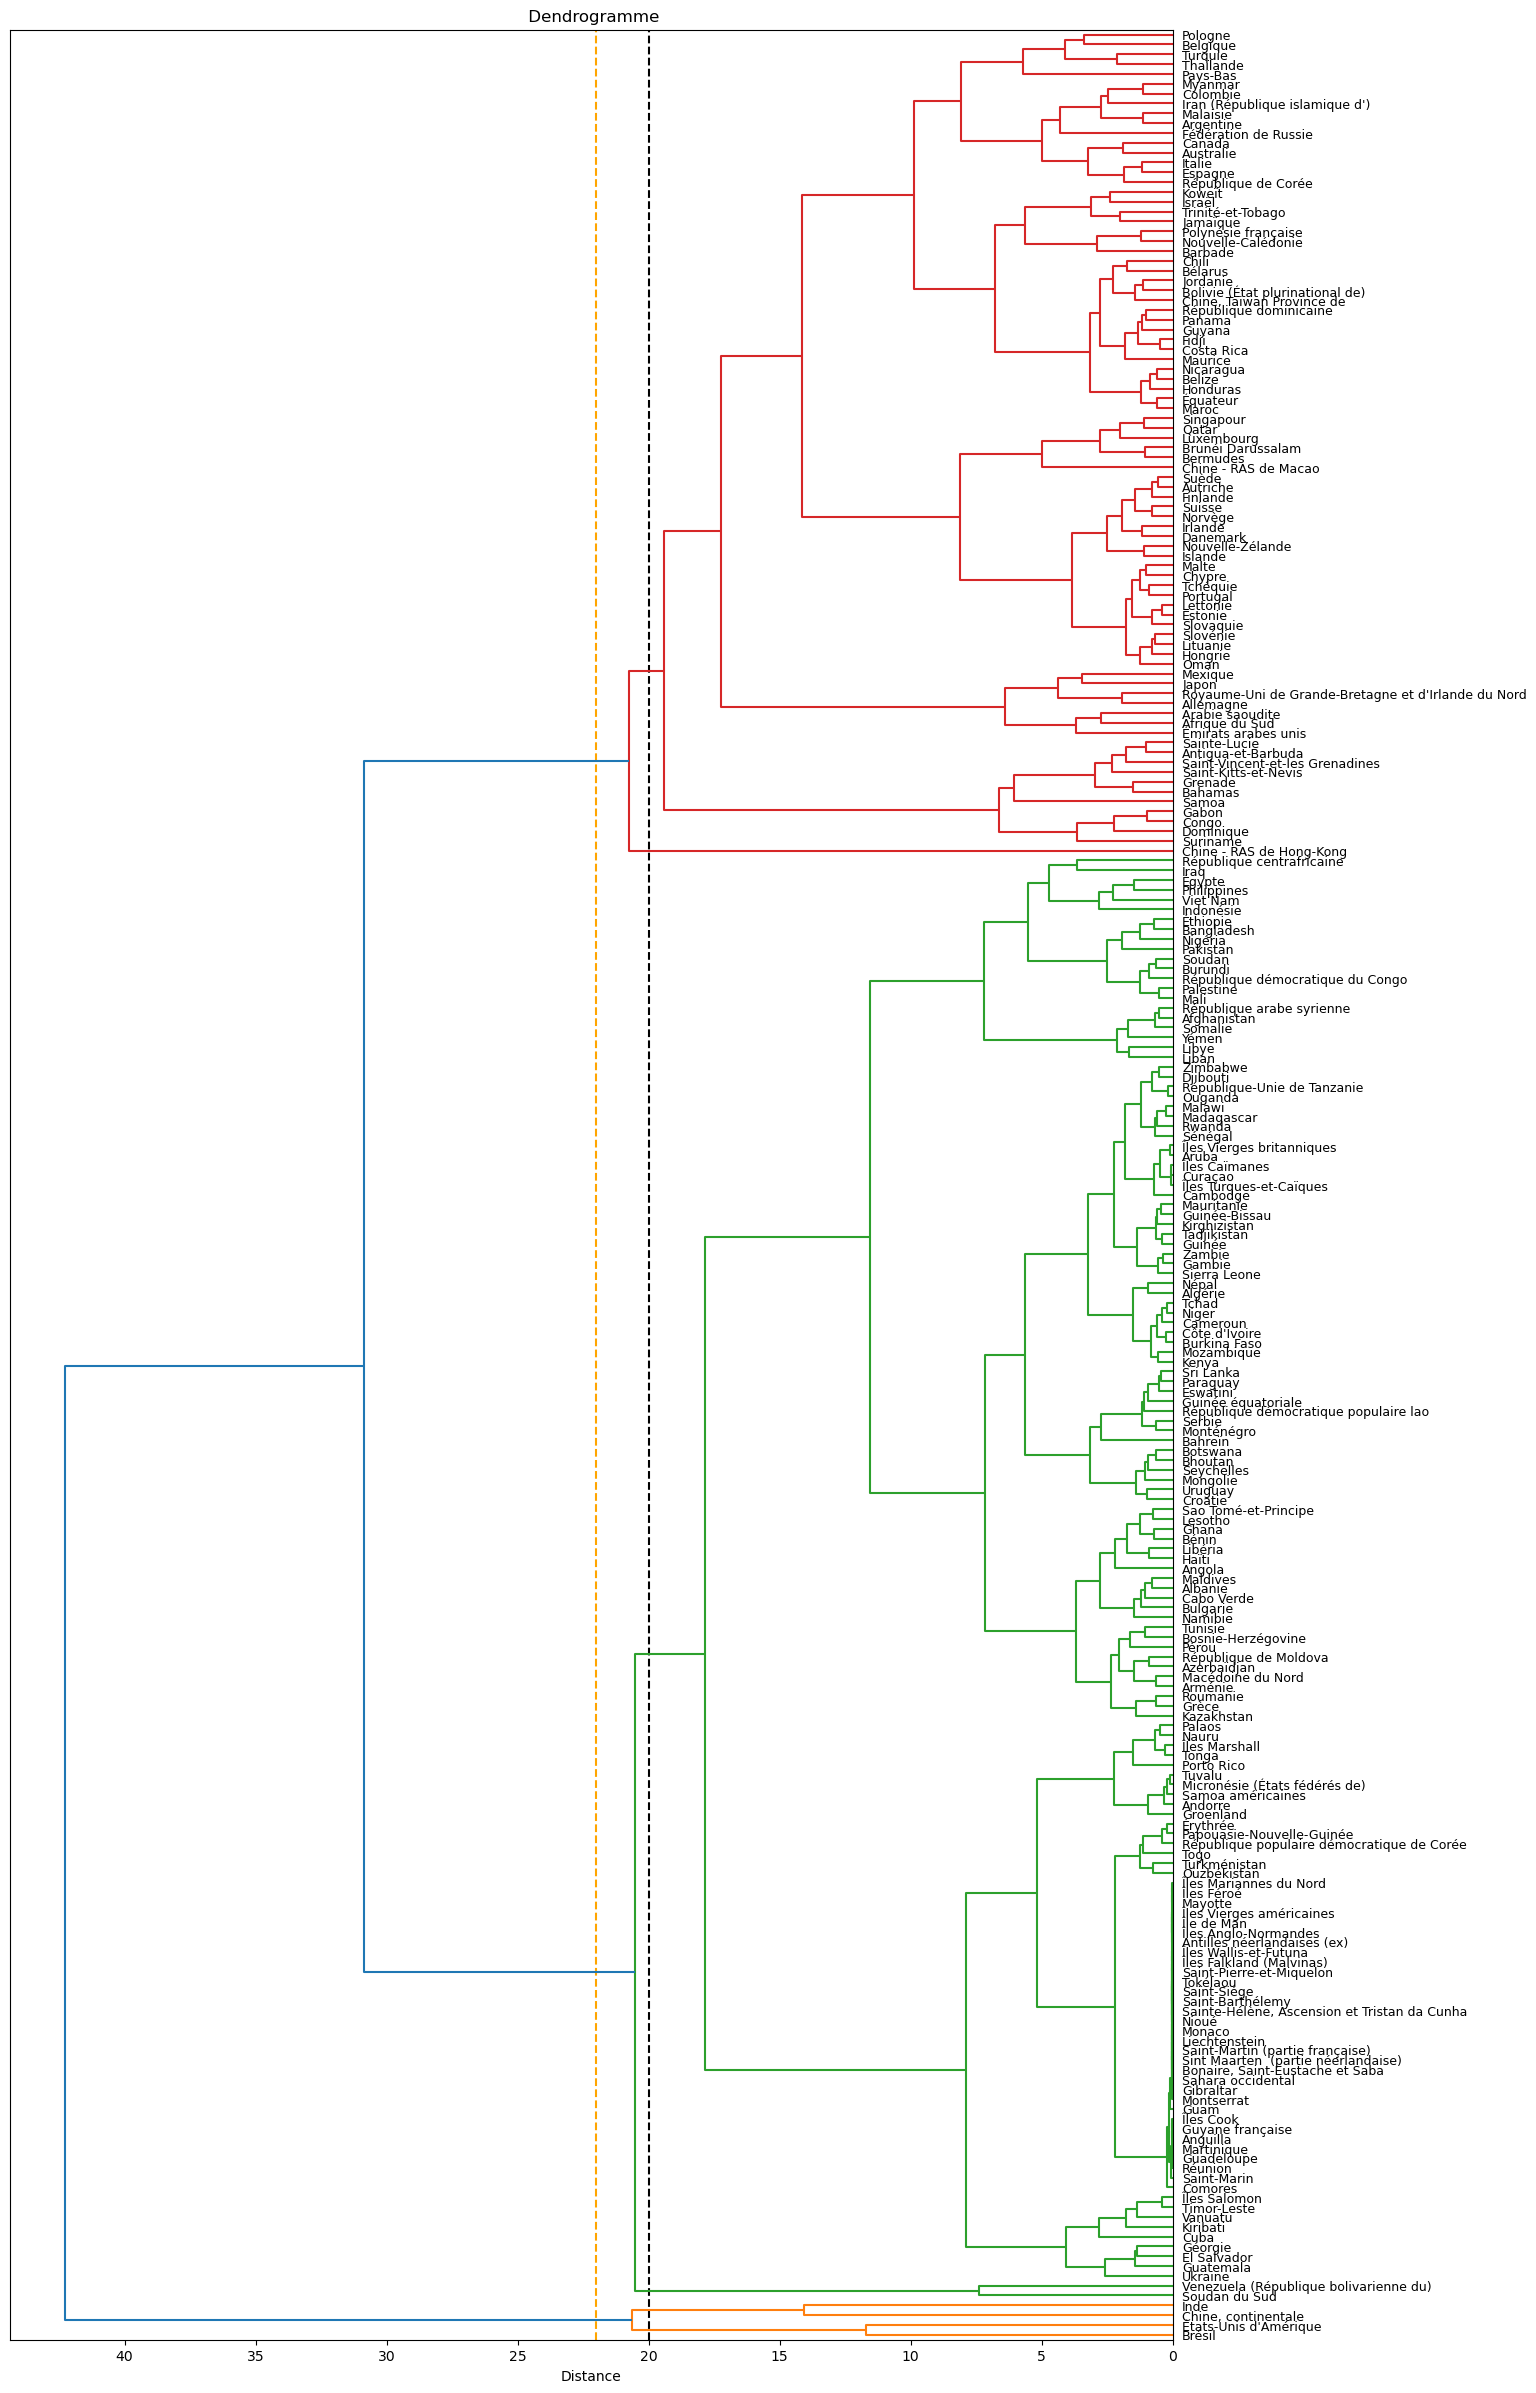

In [260]:
#Définit une fonction clust_dendrogram prenant deux arguments : Z: la matrice de liaison 
#et names:une liste d'éléments à regrouper
def clust_dendrogram(Z,names):  
    plt.figure(figsize=(15,30)) 
#Inserer des lignes pointillées indiquent ainsi des points de coupure potentiels dans le dendrogramme. 
    plt.axvline(x=20,color="black", linestyle="dashed")   
    plt.axvline(x=22, color ="orange", linestyle="dashed")
    plt.title(" Dendrogramme")  
    plt.xlabel("Distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp",
        orientation = "left", 
        p=240,                
        leaf_font_size = 9    
    )
    plt.show()    
X = df.values    
X[np.isinf(X)] = np.nan 
X = np.nan_to_num(X)    
names = df.index
std_scale = preprocessing.StandardScaler().fit(X)    

X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, "ward", metric= "euclidean")          
# Affichage du dendrogramme
clust_dendrogram(Z,names)

En utilisant la hauteur des branches comme critère, on peut choisir de couper le dendrogramme à un certain niveau de hauteur, ce qui correspond à une certaine distance entre les clusters ce qui nous donne comme il est évident 6 cluters intialement .

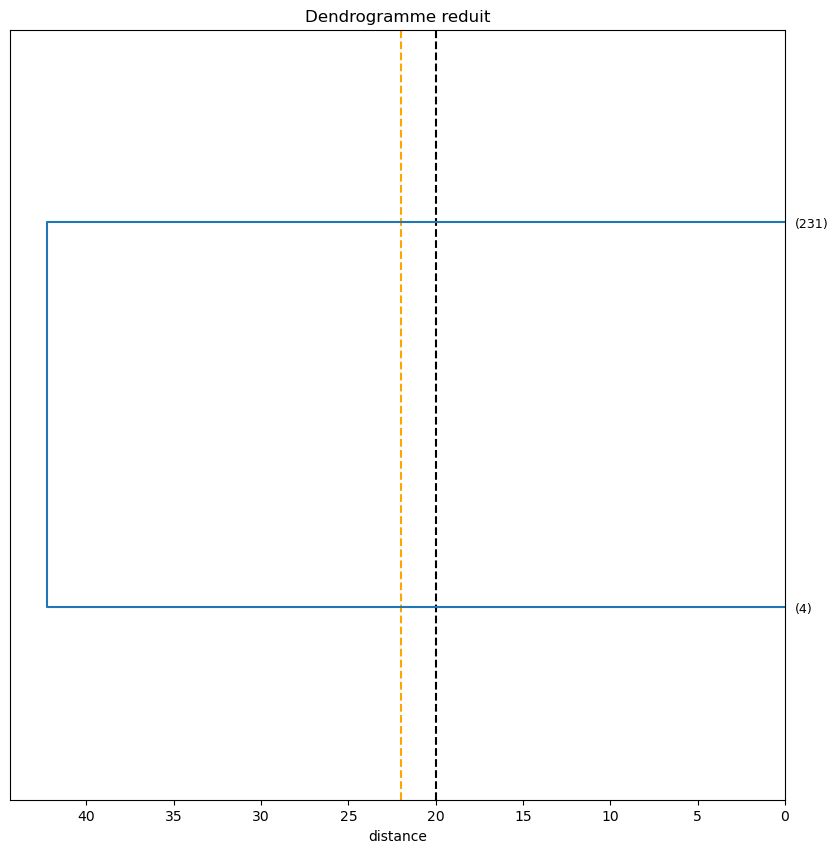

In [261]:
def clust_dendrogram2(Z,names):  
    plt.figure(figsize=(10,10))    
    plt.axvline(x=20,color="black", linestyle="dashed")  
    plt.axvline(x=22, color ="orange", linestyle="dashed")
    plt.title( "Dendrogramme reduit")    
    plt.xlabel("distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp",
        orientation = "left", 
        p=2,                
        leaf_font_size = 9    
    )
    plt.show()     
       
clust_dendrogram2(Z,names)

dans le 1er à graphique on a constaté que il y a quelques clusters qui sont regroupés et qui ont l'air similaire entre eux donc j'ai décidé de faire un autre graphique sur deux groupes(p=2) pour savoir quels sont exactement ces clusters

In [262]:
#segmenter les éléments en 2 clusters 
clusters = fcluster(Z,2, criterion = "maxclust")
classes2 = pd.DataFrame({"cluster": clusters,"Zone":names})

classes2

,cluster,Zone
0,2,Afghanistan
1,2,Afrique du Sud
2,2,Albanie
3,2,Algérie
4,2,Allemagne
...,...,...
230,2,Îles Salomon
231,2,Îles Turques-et-Caïques
232,2,Îles Vierges américaines
233,2,Îles Vierges britanniques


In [263]:
#DataFrame result_clustering2 contenant les moyennes des valeurs de chaque colonne
#fusionner les DataFrames df et classes2 sur la colonne "Zone". 
data_clust2 = pd.merge(df, classes2, on=["Zone"], how="outer")
result_clustering2 = data_clust2.drop("Zone", axis=1).groupby("cluster").mean()

result_clustering2

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
cluster,,,,,,,,,,,,,,,
1,823154288.75,29.56,12517.50,2123.75,144.50,12141.25,14474.00,0.10,1.49,3.39,-0.23,1042.90,23687.08,40960.22,0.60
2,18141447.81,14.44,282.46,38.31,61.19,266.87,269.20,1.82,0.32,2.13,-0.06,835.25,16074.07,1494.40,6.90


In [264]:
#calcul des moyennes des indicateurs dans chaque cluste
df_means2 = result_clustering2.groupby("cluster").mean().round (decimals = 2)
result_clustering2["population"] = result_clustering2["population"].astype(int)
pd.set_option("display.float_format", "{:.2f}".format)
df_means2

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
cluster,,,,,,,,,,,,,,,
1,823154288.75,29.56,12517.50,2123.75,144.50,12141.25,14474.00,0.10,1.49,3.38,-0.24,1042.90,23687.08,40960.22,0.60
2,18141447.81,14.44,282.46,38.31,61.19,266.87,269.20,1.82,0.32,2.13,-0.06,835.25,16074.07,1494.40,6.90


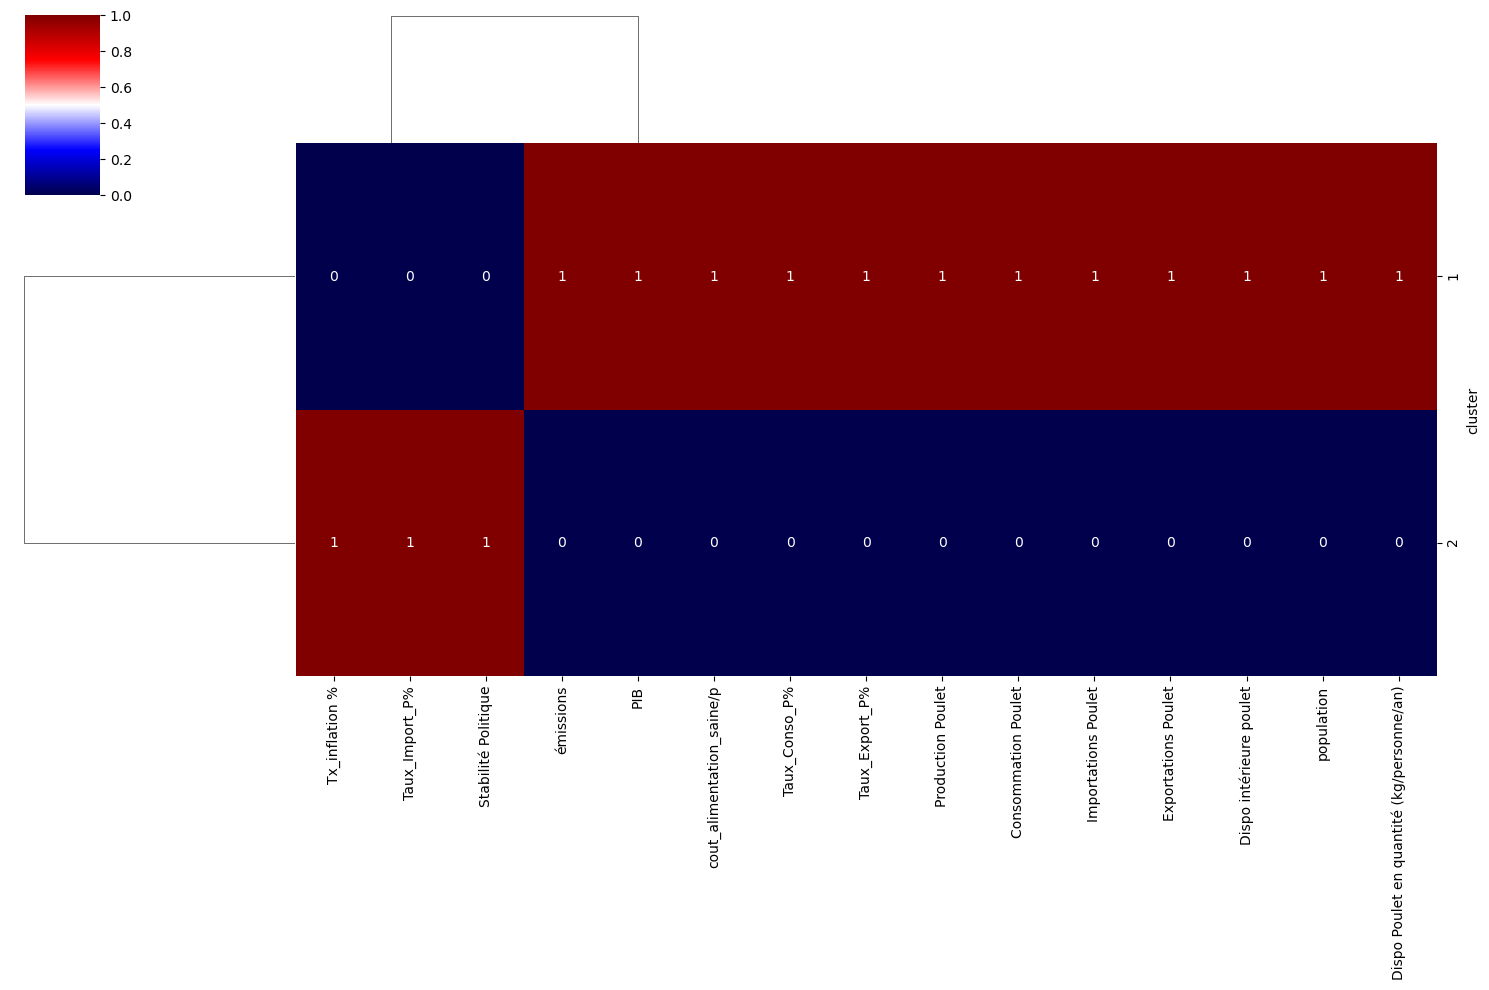

In [265]:
sns.clustermap(df_means2, figsize = (15,10), annot = True, standard_scale =1, cmap="seismic")
plt.show()

#### organise les données de classes2 en sous-groupes pour chaque cluster

In [266]:
df_par_cluster2 = {}
#Sélectionner les lignes du DataFrame classes2 où la valeur de la colonne "cluster" est égale à la
#valeur du cluster en cours d'itération. Ensuite, une copie de ces lignes est créée et stockée dans cluster_df2
for cluster in classes2["cluster"].unique():
    cluster_df2 = classes2[classes2["cluster"] == cluster].copy()
    nom_df = f"cluster{cluster}"
    df_par_cluster2[nom_df] = cluster_df2
 #Parcourir chaque élément du dictionnaire df_par_cluster2, où nom_df est le nom du DataFrame (clé)
#et df_clust est le DataFrame correspondant (valeur).   
for nom_df, df_clust in df_par_cluster2.items():
    print(f"cluster {nom_df}:")
    print(df_clust)
    print()

cluster cluster2:
     cluster                       Zone
0          2                Afghanistan
1          2             Afrique du Sud
2          2                    Albanie
3          2                    Algérie
4          2                  Allemagne
..       ...                        ...
230        2               Îles Salomon
231        2    Îles Turques-et-Caïques
232        2   Îles Vierges américaines
233        2  Îles Vierges britanniques
234        2      Îles Wallis-et-Futuna

[231 rows x 2 columns]

cluster cluster1:
     cluster                   Zone
30         1                 Brésil
44         1    Chine, continentale
83         1                   Inde
220        1  États-Unis d'Amérique



In [267]:
df_par_cluster2["cluster1"].head()

,cluster,Zone
30,1,Brésil
44,1,"Chine, continentale"
83,1,Inde
220,1,États-Unis d'Amérique


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, Afghanistan to Îles Wallis-et-Futuna
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   population                                 235 non-null    int64  
 1   Dispo Poulet en quantité (kg/personne/an)  235 non-null    float64
 2   Dispo intérieure poulet                    235 non-null    float64
 3   Exportations Poulet                        235 non-null    float64
 4   Importations Poulet                        235 non-null    float64
 5   Consommation Poulet                        235 non-null    float64
 6   Production Poulet                          235 non-null    float64
 7   Taux_Import_P%                             235 non-null    float64
 8   Taux_Export_P%                             235 non-null    float64
 9   Taux_Conso_P%                              235 non-null    float64
 10  Sta

##  Vérification les variables marquants s'ils existent dans un cluster 

In [269]:
top_population = df.sort_values(by="population",ascending=False)
top_population["population"] .head(6)

Zone
Chine, continentale      1421021791
Inde                     1338676785
États-Unis d'Amérique     325084756
Indonésie                 264650963
Pakistan                  207906209
Brésil                    207833823
Name: population, dtype: int64

In [270]:
top_production = df.sort_values(by="Production Poulet",ascending=False)
top_production["Production Poulet"].head()

Zone
États-Unis d'Amérique   21914.00
Chine, continentale     18236.00
Brésil                  14201.00
Fédération de Russie     4444.00
Inde                     3545.00
Name: Production Poulet, dtype: float64

In [271]:
top_export = df.sort_values(by="Exportations Poulet",ascending=False)
top_export["Exportations Poulet"].head(10)

Zone
Brésil                     4223.00
États-Unis d'Amérique      3692.00
Pays-Bas                   1418.00
Pologne                    1025.00
Thaïlande                   796.00
Chine - RAS de Hong-Kong    663.00
Belgique                    656.00
Allemagne                   646.00
Chine, continentale         576.00
Turquie                     429.00
Name: Exportations Poulet, dtype: float64

In [272]:
top_co2 = df.sort_values(by="émissions",ascending=False)
top_co2["émissions"].head()

Zone
États-Unis d'Amérique   88151.78
Chine, continentale     38655.33
Brésil                  25956.27
Japon                   21773.08
Canada                  18779.48
Name: émissions, dtype: float64

In [273]:
top_dispo = df.sort_values(by="Dispo intérieure poulet",ascending=False)
top_dispo["Dispo intérieure poulet"].head(6)

Zone
États-Unis d'Amérique   18266.00
Chine, continentale     18161.00
Brésil                   9982.00
Fédération de Russie     4556.00
Mexique                  4219.00
Inde                     3661.00
Name: Dispo intérieure poulet, dtype: float64

In [274]:
top_PIB = df.sort_values(by="PIB",ascending=False)
top_PIB["PIB"].head()

Zone
Chine - RAS de Macao   122978.00
Luxembourg             114986.00
Singapour               95310.30
Qatar                   92177.60
Bermudes                81835.00
Name: PIB, dtype: float64

In [275]:
liste_distinct = df_par_cluster2["cluster1"]["Zone"].tolist()
print(liste_distinct)

['Brésil', 'Chine, continentale', 'Inde', "États-Unis d'Amérique"]


In [276]:
#réinitialise l'index du DataFrame df en remplaçant l'index existant par un nouvel index numérique
df.reset_index(inplace = True)

In [277]:
#extrait un sous-ensemble de données de df contenant uniquement les entrées associées 
#aux zones répertoriées dans la liste "liste_distinct"
df_distinct = df[df["Zone"].isin(liste_distinct)].copy()
df_distinct.head()

,Zone,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
30,Brésil,207833823,48.03,9982.00,4223.00,3.00,9982.00,14201.00,0.02,2.74,6.23,-0.47,1025.29,14477.90,25956.27,0.95
44,"Chine, continentale",1421021791,12.33,18161.00,576.00,452.00,17518.00,18236.00,0.22,1.43,1.27,0.00,938.42,14243.50,38655.33,-0.19
83,Inde,1338676785,2.22,3661.00,4.00,0.00,2965.00,3545.00,0.00,0.01,0.42,-0.76,1030.76,6112.10,11077.48,1.82
220,États-Unis d'Amérique,325084756,55.68,18266.00,3692.00,123.00,18100.00,21914.00,0.15,1.78,5.62,0.29,1177.12,59914.80,88151.78,-0.20


In [278]:
df

,Zone,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
0,Afghanistan,36296113,1.53,57.00,0.00,29.00,55.00,28.00,0.64,0.00,0.42,-2.80,0.00,2096.10,336.05,6.96
1,Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
2,Albanie,2884169,16.36,47.00,0.00,38.00,47.00,13.00,4.30,0.00,1.29,0.38,1442.48,12771.00,268.64,3.92
3,Algérie,41389189,6.38,277.00,0.00,2.00,264.00,275.00,0.01,0.00,0.80,-0.92,1373.50,11809.50,4680.38,5.04
4,Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Îles Salomon,636039,4.45,3.00,0.00,6.00,3.00,0.00,4.84,0.00,0.72,0.20,0.00,2625.10,20.41,-0.65
231,Îles Turques-et-Caïques,37115,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1025.29,0.00,16.35,0.00
232,Îles Vierges américaines,104751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
233,Îles Vierges britanniques,29577,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1180.77,0.00,3.92,-1.83


#### créer un nouveau DataFrame df_neu qui contient toutes les lignes du DataFrame df pour lesquelles la valeur de la colonne "Zone" n'est pas présente dans la liste liste_distinct

In [279]:
df_neu = df[~df["Zone"].isin(liste_distinct)].copy()

In [280]:
df_neu = df_neu.set_index("Zone")

In [281]:
#affiche une heatmap interactive pour visualiser les 
#relations de corrélation entre les variables du DataFrame df
df = df_neu
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.finfo(np.float64).max)

x = df.columns.tolist()


z =df[x].corr()

hovercell = list()
for yi, yy in enumerate(x):
    hovercell.append(list())
    for xi, xx in enumerate(x):
        hovercell[-1].append("X: {}<br />Y: {}<br />Corr:{}".format(xx, yy, round(stats.pearsonr(df[xx],df[yy])[0],2)))
        
map = [go.Heatmap(z=z, x=x, y=x,
                 xgap=1, ygap=1,
                 colorbar_thickness=20,
                 colorbar_ticklen=3,
                 hoverinfo='text',
                 text=hovercell)] 
                 
title = "Matrice de corrélation"

layout = go.Layout(title_text=title, title_x=0.5,
                   width= 950, height = 800,
                   xaxis_showgrid = False,
                   yaxis_showgrid = False, 
                   yaxis_autorange = "reversed")

fig = go.Figure(data = map, layout = layout)
iplot(fig, filename = "pandas-heatmap")   

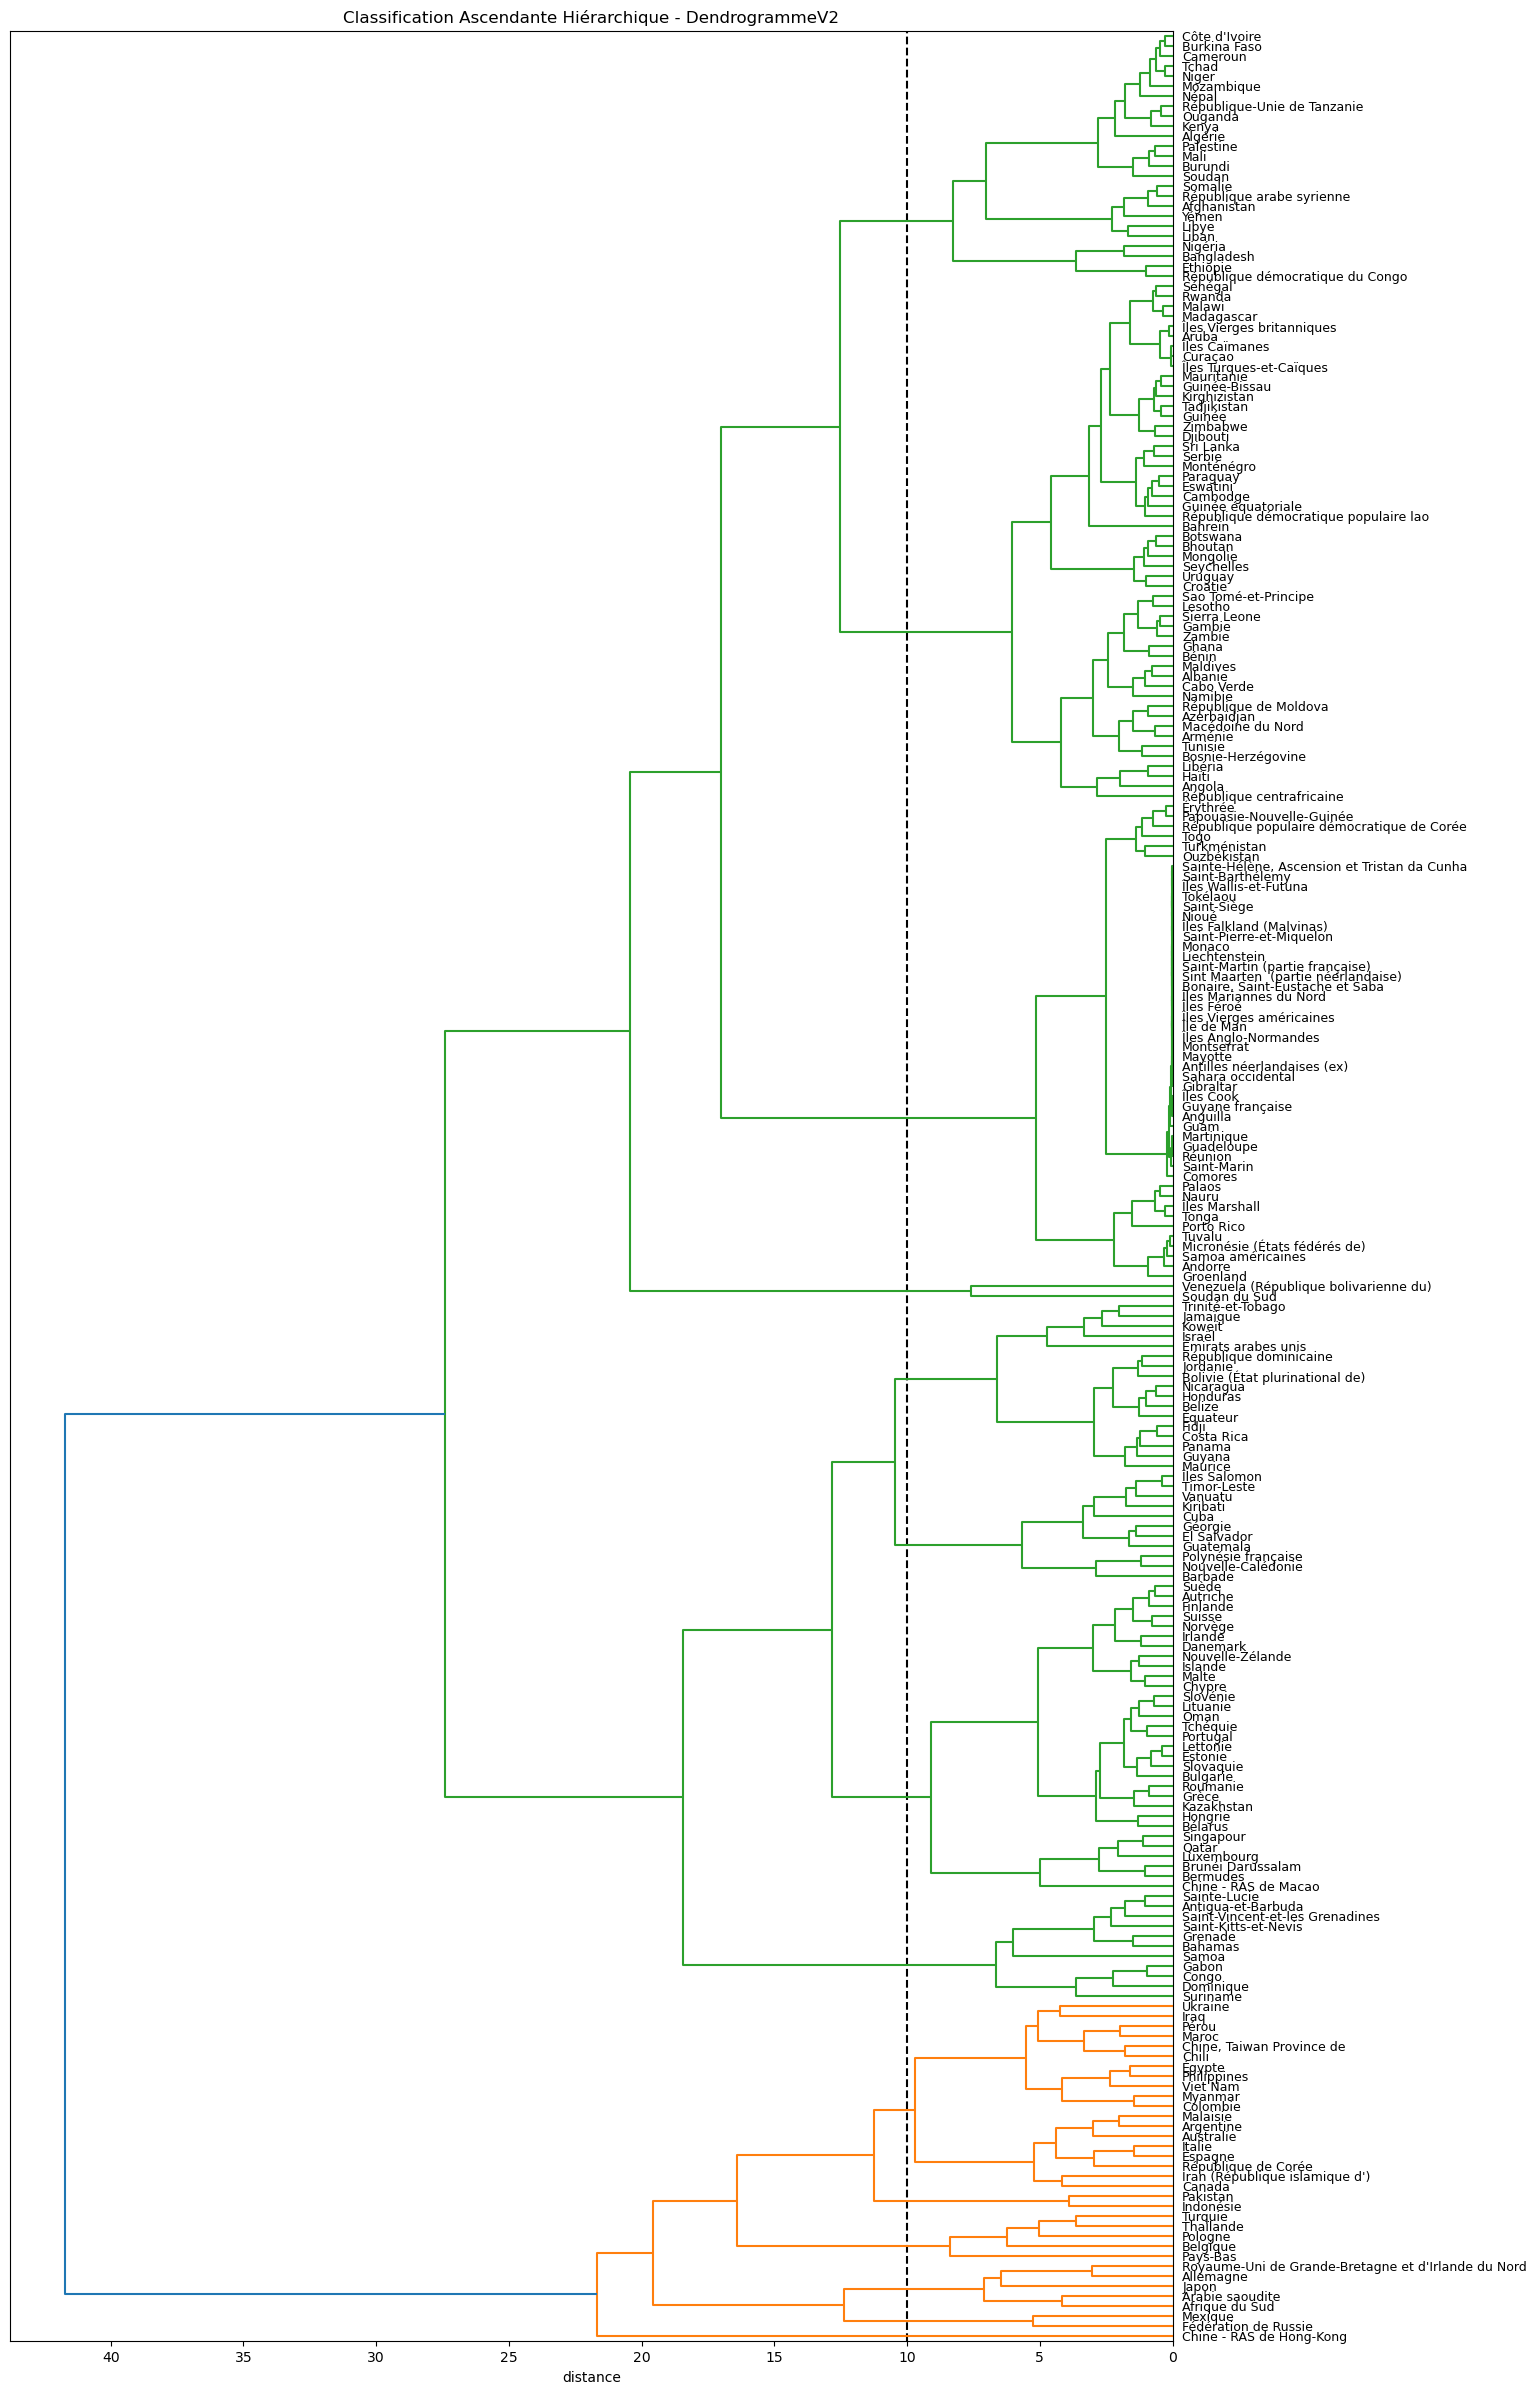

In [282]:
def clust_dendrogramV2(Z,names):  
    plt.figure(figsize=(15,30))    
    plt.axvline(x=10,color="black", linestyle="dashed")   
    plt.axvline(x=210, color ="orange", linestyle="dashed")
    plt.title("Classification Ascendante Hiérarchique - DendrogrammeV2")    
    plt.xlabel("distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp", 
        orientation = "left", 
        p=240,                
        leaf_font_size = 9    
    )
    plt.show()     
X = df_neu.values    
X[np.isinf(X)] = np.nan 
X = np.nan_to_num(X)    
names = df_neu.index 

std_scale = preprocessing.StandardScaler().fit(X)   
    
X_scaled = std_scale.transform(X)

Z = linkage(X_scaled, "ward", metric = "euclidean")          

clust_dendrogramV2(Z,names)

En utilisant la hauteur des branches comme critère, on peut choisir de couper le dendrogramme à un certain niveau de hauteur, ce qui correspond à une certaine distance entre les clusters ce qui nous donne comme il est évident 6 cluters intialement .

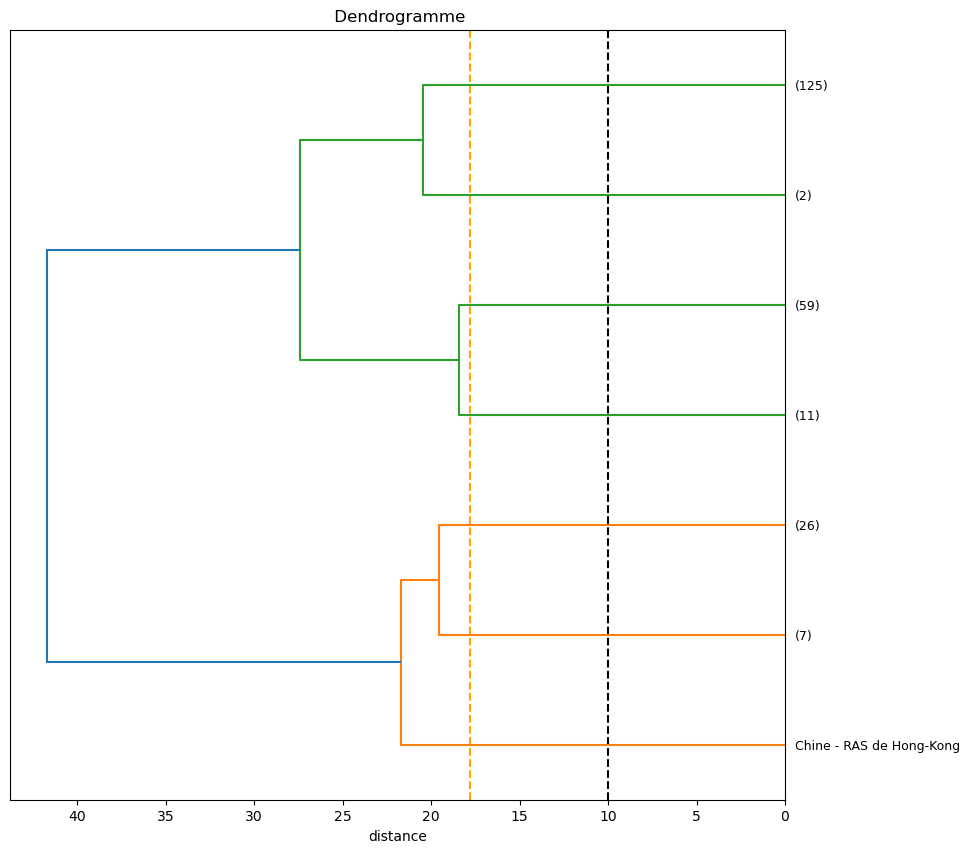

In [283]:
def clust_dendrogram3(Z,names):  
    plt.figure(figsize=(10,10))    
    plt.axvline(x=10,color="black", linestyle="dashed")  
    plt.axvline(x=17.8, color ="orange", linestyle="dashed")
    plt.title(" Dendrogramme")    
    plt.xlabel("distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp",
        orientation = "left", 
        p=7,                
        leaf_font_size = 9    
    )
    plt.show()     
       
clust_dendrogram3(Z,names)

In [284]:
#visualiser l'éboulis des valeurs propres d'une analyse en composantes principales (PCA) 
def display_scree_eigenvalues(pca):          #Définit la fonction prenant comme argument "pca", un objet résultant d'une ACP
    # calcule les pourcentages d'inertie (variance expliquée) à partir des valeurs propres
    scree = pca.explained_variance_ratio_*100   
    # L'objet "pca" doit avoir un attribut "explained_variance_ratio_" qui contient ces pourcentages.
    #crée un graphique en barre où chaque barre représente le pourcentage d'inertie pour chaque axe d'inertie
    plt.bar(np.arange(len(scree))+1, scree)    
    
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c = "red", marker ="o")  # - Création d'un courbe cumulative en reliant les
    
    plt.xlabel("composante principale")    
    plt.ylabel("pourcentage d'inertie ")
    plt.title("Eboulis des valeurs propres")
    plt.show(block = False)

In [285]:
#effectuer une analyse en composantes principales (PCA) sur les données contenues dans le DataFrame df_neu
n_comp = 15            
data_pca = df_neu   
data_pca = data_pca.fillna(0)  
X=data_pca.values               
names = df_neu.index        
features = data_pca.columns    

# Initialiser un objet StandardScaler pour standardiser les données
std_scale = preprocessing.StandardScaler().fit(X) 
X_scaled = std_scale.transform(X) 
 #Initialise un objet PCA et l'ajuster aux données standardisées
pca = decomposition.PCA(n_components = n_comp)                
pca.fit(X_scaled) 
                  


PCA(n_components=15)

In [286]:
#créer un DataFrame poulet à partir de la matrice X_scaled.
poulet = pd.DataFrame(X_scaled,
                     index = df_neu.index,
                     columns = df_neu.columns)

In [287]:
#les pourcentages d'inertie expliquée par chaque composante principale
pca.explained_variance_ratio_

array([3.51238903e-01, 1.87020790e-01, 1.02627712e-01, 8.26426923e-02,
       6.27900578e-02, 5.80984285e-02, 4.04529644e-02, 3.10720755e-02,
       2.76201563e-02, 2.51227398e-02, 1.75134136e-02, 1.04313566e-02,
       2.35176850e-03, 8.02572768e-04, 2.14368974e-04])

In [288]:
#calcule la somme cumulative des pourcentages d'inertie expliquée
pca.explained_variance_ratio_.cumsum()

array([0.3512389 , 0.53825969, 0.64088741, 0.7235301 , 0.78632016,
       0.84441858, 0.88487155, 0.91594362, 0.94356378, 0.96868652,
       0.98619993, 0.99663129, 0.99898306, 0.99978563, 1.        ])

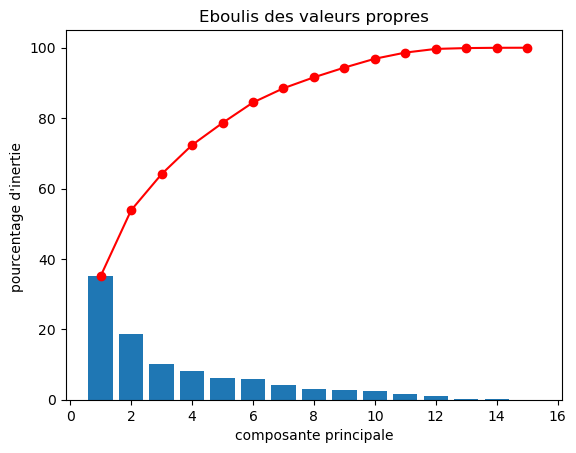

In [289]:
#affiche le graphique  "Eboulis des valeurs propres" 
display_scree_eigenvalues(pca)

Je vais choisir 6 composantes principales

In [290]:
#attribuer des observations à des clusters à partir de la matrice de liaison Z obtenue après une analyse de clustering hierarchique
clusters = fcluster(Z,6, criterion = "maxclust") #  
classes6 = pd.DataFrame({"cluster": clusters,"Zone":names})
print(classes6)

     cluster                       Zone
0          6                Afghanistan
1          1             Afrique du Sud
2          6                    Albanie
3          6                    Algérie
4          1                  Allemagne
..       ...                        ...
226        4               Îles Salomon
227        6    Îles Turques-et-Caïques
228        6   Îles Vierges américaines
229        6  Îles Vierges britanniques
230        6      Îles Wallis-et-Futuna

[231 rows x 2 columns]


In [291]:
# Création d'un DataFrame "classes_clust" indexé par la zone, contenant les clusters attribués à chaque zone.
classes_clust = classes6.set_index("Zone")

# Fusion du DataFrame "poulet" avec les classes attribuées à chaque zone pour former "data_clust6".
data_clust6 = pd.merge(poulet, classes6, on=["Zone"], how="outer")

# Calcul des moyennes des variables standardisées pour chaque cluster dans "data_clust6".
result_clustering6 = data_clust6.drop("Zone", axis=1).groupby("cluster").mean()

# Affichage du DataFrame contenant les moyennes des variables standardisées pour chaque cluster.
result_clustering6


,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
cluster,,,,,,,,,,,,,,,
1,2.06,1.00,3.80,0.89,4.19,3.87,3.18,0.18,0.35,0.92,0.02,0.69,0.91,3.72,-0.11
2,1.29,0.58,1.53,1.17,0.44,1.47,1.77,-0.29,0.28,0.44,-0.39,0.46,0.22,1.34,-0.06
3,-0.31,2.44,-0.00,4.11,5.29,0.21,-0.40,2.27,13.72,1.90,0.98,0.85,2.07,-0.19,-0.06
4,-0.38,0.88,-0.25,-0.13,-0.09,-0.25,-0.26,0.60,0.05,0.84,0.66,0.25,0.72,-0.24,-0.13
5,0.06,-0.27,0.05,-0.25,-0.30,0.05,0.05,-0.46,-0.24,-0.09,-1.98,-1.41,-0.76,0.14,9.95
6,-0.17,-0.69,-0.39,-0.25,-0.31,-0.39,-0.40,-0.30,-0.21,-0.63,-0.26,-0.26,-0.50,-0.35,-0.07


In [292]:
data_clust6

,Zone,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %,cluster
0,Afghanistan,0.51,-0.81,-0.36,-0.25,-0.20,-0.35,-0.39,-0.35,-0.24,-0.68,-3.01,-1.41,-0.66,-0.34,0.00,6
1,Afrique du Sud,1.10,1.33,2.92,0.16,2.83,2.94,2.28,1.16,0.19,1.71,-0.24,1.12,-0.10,1.06,0.00,1
2,Albanie,-0.43,0.12,-0.37,-0.25,-0.14,-0.37,-0.42,0.74,-0.24,-0.33,0.48,1.03,-0.16,-0.36,-0.08,6
3,Algérie,0.66,-0.50,-0.01,-0.25,-0.37,-0.00,0.01,-0.54,-0.24,-0.53,-0.95,0.91,-0.20,0.94,-0.05,6
4,Allemagne,1.82,0.31,2.32,3.99,4.88,2.24,2.03,-0.16,0.60,-0.03,0.71,0.31,1.75,3.67,-0.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Îles Salomon,-0.49,-0.62,-0.44,-0.25,-0.35,-0.44,-0.44,0.90,-0.24,-0.56,0.28,-1.41,-0.64,-0.44,-0.21,4
227,Îles Turques-et-Caïques,-0.51,-0.90,-0.45,-0.25,-0.38,-0.44,-0.44,-0.54,-0.24,-0.85,0.06,0.32,-0.76,-0.44,-0.20,6
228,Îles Vierges américaines,-0.51,-0.90,-0.45,-0.25,-0.38,-0.44,-0.44,-0.54,-0.24,-0.85,0.06,-1.41,-0.76,-0.44,-0.20,6
229,Îles Vierges britanniques,-0.51,-0.90,-0.45,-0.25,-0.38,-0.44,-0.44,-0.54,-0.24,-0.85,0.06,0.58,-0.76,-0.44,-0.25,6


In [293]:
result_clustering6.describe()

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
count,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
mean,0.42,0.66,0.79,0.92,1.54,0.83,0.66,0.33,2.32,0.56,-0.16,0.10,0.44,0.74,1.59
std,1.01,1.10,1.63,1.68,2.52,1.63,1.49,1.02,5.59,0.88,1.04,0.83,1.03,1.59,4.10
min,-0.38,-0.69,-0.39,-0.25,-0.31,-0.39,-0.40,-0.46,-0.24,-0.63,-1.98,-1.41,-0.76,-0.35,-0.13
25%,-0.27,-0.06,-0.19,-0.22,-0.25,-0.17,-0.36,-0.29,-0.15,0.04,-0.36,-0.13,-0.32,-0.23,-0.10
50%,-0.06,0.73,0.02,0.38,0.18,0.13,-0.11,-0.05,0.16,0.64,-0.12,0.35,0.47,-0.03,-0.06
75%,0.98,0.97,1.16,1.10,3.26,1.16,1.34,0.49,0.33,0.90,0.50,0.63,0.86,1.04,-0.06
max,2.06,2.44,3.80,4.11,5.29,3.87,3.18,2.27,13.72,1.90,0.98,0.85,2.07,3.72,9.95


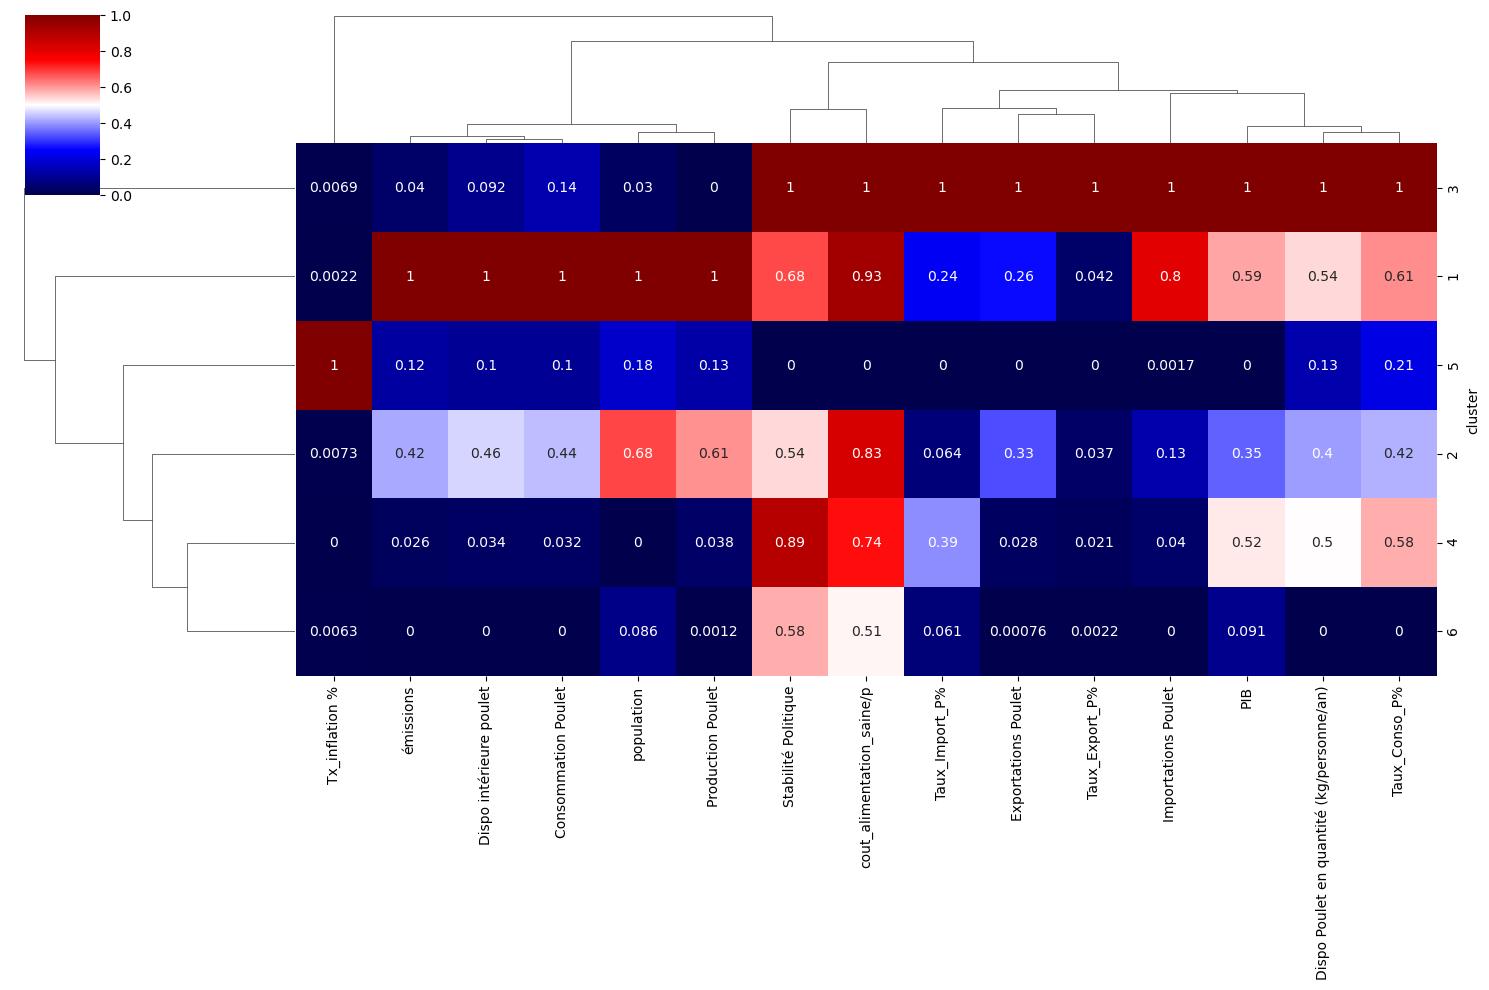

In [294]:
# Création d'une carte de cluster utilisant les moyennes des variables standardisées pour chaque cluster
clustermap = sns.clustermap(result_clustering6, figsize=(15, 10), annot=True, standard_scale=1, cmap="seismic")

# Extraction des données annotées à partir de la carte de cluster
annot_data = clustermap.data2d

# Création d'un DataFrame à partir des données annotées
df_annot = pd.DataFrame(annot_data)

# Affichage de la carte de cluster
plt.show()

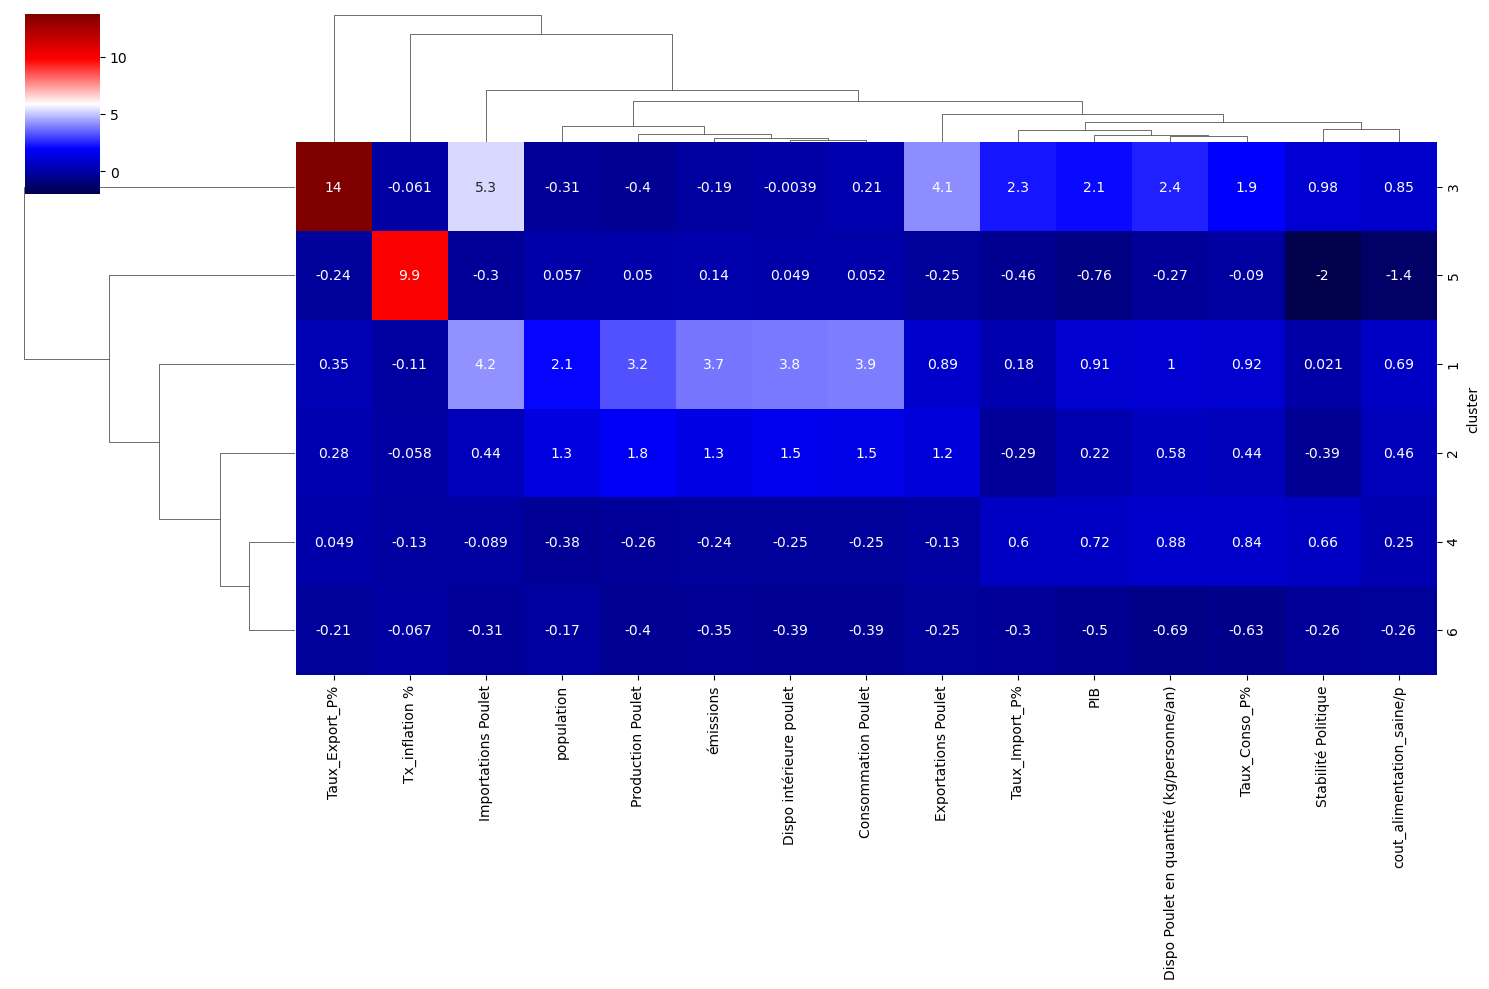

In [295]:
clustermap = sns.clustermap(result_clustering6, figsize = (15,10), annot = True, standard_scale =None, cmap="seismic")
#Cela signifie que les données ne seront pas mises à la même échelle, 

In [296]:
#afficher la table permettant d'examiner les moyennes des variables pour chaque cluster
print(df_annot)

         Tx_inflation %  émissions  Dispo intérieure poulet  \
cluster                                                       
3                  0.01       0.04                     0.09   
1                  0.00       1.00                     1.00   
5                  1.00       0.12                     0.10   
2                  0.01       0.42                     0.46   
4                  0.00       0.03                     0.03   
6                  0.01       0.00                     0.00   

         Consommation Poulet  population  Production Poulet  \
cluster                                                       
3                       0.14        0.03               0.00   
1                       1.00        1.00               1.00   
5                       0.10        0.18               0.13   
2                       0.44        0.68               0.61   
4                       0.03        0.00               0.04   
6                       0.00        0.09              

In [297]:
# vérifier le type de chaque colonne dans result_clustering6
for col in result_clustering6.columns:
    if isinstance(result_clustering6[col], pd.Series):
        print(f"{col} est de type Series")
    else:
        print(f"{col} n'est pas de type Series")

population est de type Series
Dispo Poulet en quantité (kg/personne/an) est de type Series
Dispo intérieure poulet est de type Series
Exportations Poulet est de type Series
Importations Poulet est de type Series
Consommation Poulet est de type Series
Production Poulet est de type Series
Taux_Import_P% est de type Series
Taux_Export_P% est de type Series
Taux_Conso_P% est de type Series
Stabilité Politique est de type Series
cout_alimentation_saine/p est de type Series
PIB est de type Series
émissions est de type Series
Tx_inflation % est de type Series


In [298]:
#affecte les noms des colonnes de result_clustering6 à la variable columns_to_process.
columns_to_process = result_clustering6.columns

In [299]:
#catégorise les valeurs dans un DataFrame en fonction de certains seuils
def map_to_categories(value):
     
    if value >= 0.7:
        return "Forte"
    elif value > 0.3 and value < 0.7: 
        return "Moyenne"
    else :
        return "Faible"
    
columns_by_cluster = {}

for col in df_annot.columns: 
    if col in columns_to_process and isinstance(df_annot[col], pd.Series):
        df_annot[col + "_cat"] = df_annot[col].apply(map_to_categories)
    
grouped_data = df_annot.groupby("cluster")

for cluster, group in grouped_data:
    columns_by_cluster[cluster] = {}
    
    for category in ['Forte', 'Moyenne', 'Faible']:
        columns_with_category = [col.replace("_cat", "") for col in group.columns if group[col].iloc[0] == category]
        columns_by_cluster[cluster][category] = columns_with_category

for cluster, columns_dict in columns_by_cluster.items():
        print("\n","cluster {}:".format(cluster))
        for category, columns_list in columns_dict.items():
            print(" valeurs {} : {}".format(category, ", ".join(columns_list)))


 cluster 1:
 valeurs Forte : émissions, Dispo intérieure poulet, Consommation Poulet, population, Production Poulet, cout_alimentation_saine/p, Importations Poulet
 valeurs Moyenne : Stabilité Politique, PIB, Dispo Poulet en quantité (kg/personne/an), Taux_Conso_P%
 valeurs Faible : Tx_inflation %, Taux_Import_P%, Exportations Poulet, Taux_Export_P%

 cluster 2:
 valeurs Forte : cout_alimentation_saine/p
 valeurs Moyenne : émissions, Dispo intérieure poulet, Consommation Poulet, population, Production Poulet, Stabilité Politique, Exportations Poulet, PIB, Dispo Poulet en quantité (kg/personne/an), Taux_Conso_P%
 valeurs Faible : Tx_inflation %, Taux_Import_P%, Taux_Export_P%, Importations Poulet

 cluster 3:
 valeurs Forte : Stabilité Politique, cout_alimentation_saine/p, Taux_Import_P%, Exportations Poulet, Taux_Export_P%, Importations Poulet, PIB, Dispo Poulet en quantité (kg/personne/an), Taux_Conso_P%
 valeurs Moyenne : 
 valeurs Faible : Tx_inflation %, émissions, Dispo intérieur

In [300]:
# Fonction pour formater les données des clusters dans un tableau Markdown
def format_columns_clusters_markdown_table(cluster_data):
    # En-tête du tableau avec l'alignement des colonnes spécifié
    markdown = "| Colonnes | Valeurs Fortes (Clusters) | Valeurs Moyennes (Clusters) | Valeurs Faibles (Clusters) |\n"
    markdown += "|:---------|:-------------------:|:-------------------:|:---------------:|\n"
    
    # Parcours des données des clusters
    for column, clusters_dict in cluster_data.items():
        # Conversion des listes de clusters en chaînes de caractères séparées par des virgules
        forte_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Forte'])
        moyenne_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Moyenne'])
        faible_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Faible'])
        
        # Ajout d'une ligne au tableau avec les données formatées
        markdown += "| {:<15} | {:<25} | {:<25} | {:<25} |\n".format(column, forte_clusters, moyenne_clusters, faible_clusters)
    
    # Retourne le tableau Markdown complet
    return markdown

# Affichage du tableau Markdown formaté
print(format_columns_clusters_markdown_table(columns_clusters))



| Colonnes | Valeurs Fortes (Clusters) | Valeurs Moyennes (Clusters) | Valeurs Faibles (Clusters) |
|:---------|:-------------------:|:-------------------:|:---------------:|
| population      | 1, 4                      | 2, 5                      | 3, 6                      |
| Dispo Poulet en quantité (kg/personne/an) | 6                         | 1, 3                      | 2, 4, 5                   |
| Dispo intérieure poulet | 1                         | 2, 4                      | 3, 5, 6                   |
| Exportations Poulet | 6                         | 2, 5                      | 1, 3, 4                   |
| Importations Poulet | 2, 6                      | 1                         | 3, 4, 5                   |
| Consommation Poulet | 1                         | 2, 4                      | 3, 5, 6                   |
| Production Poulet | 1                         | 2, 3, 4                   | 5, 6                      |
| Taux_Import_P%  | 6                         |  

In [301]:
meilleures_colonnes = ['population', 'PIB', 'Stabilité Politique', 'Production Poulet', 
                       'Importations Poulet', 'Exportations Poulet','Consommation Poulet']
moins_bonnes_colonnes = ['cout_alimentation_saine/p', 'Tx_inflation %', 'émissions', 
                         'Dispo intérieure poulet', 'Dispo Poulet en quantité (kg/personne/an)']

df_annot['moyenne_meilleures'] = df_annot[meilleures_colonnes].mean(axis=1)

df_annot['moyenne_moins_bonnes'] = df_annot[moins_bonnes_colonnes].mean(axis=1)

indices_meilleures = df_annot['moyenne_meilleures'].nlargest(3).index.tolist()
indices_moins_bonnes = df_annot['moyenne_meilleures'].nsmallest(3).index.tolist()

indices_meilleures_moins_bonnes = df_annot['moyenne_moins_bonnes'].nlargest(3).index.tolist()
indices_moins_bonnes_moins_bonnes = df_annot['moyenne_moins_bonnes'].nsmallest(3).index.tolist()

meilleurs_clusters = [str(cluster) for cluster in indices_meilleures]
moins_bons_clusters = [str(cluster) for cluster in indices_moins_bonnes]
meilleurs_clusters_moins_bons = [str(cluster) for cluster in indices_meilleures_moins_bonnes]
moins_bons_clusters_moins_bons = [str(cluster) for cluster in indices_moins_bonnes_moins_bonnes]

phrase_finale = f"Les 3 clusters ayant les meilleures moyennes sur les colonnes \"{', '.join(meilleures_colonnes)}\" sont les clusters \"{', '.join(meilleurs_clusters)}\".\n" \
               f"Les 3 clusters ayant les meilleures moyennes sur les colonnes \"{', '.join(moins_bonnes_colonnes)}\" sont les clusters \"{', '.join(meilleurs_clusters_moins_bons)}\"."

print(phrase_finale)

Les 3 clusters ayant les meilleures moyennes sur les colonnes "population, PIB, Stabilité Politique, Production Poulet, Importations Poulet, Exportations Poulet, Consommation Poulet" sont les clusters "1, 3, 2".
Les 3 clusters ayant les meilleures moyennes sur les colonnes "cout_alimentation_saine/p, Tx_inflation %, émissions, Dispo intérieure poulet, Dispo Poulet en quantité (kg/personne/an)" sont les clusters "1, 3, 2".


In [302]:
df_annot

,Tx_inflation %,émissions,Dispo intérieure poulet,Consommation Poulet,population,Production Poulet,Stabilité Politique,cout_alimentation_saine/p,Taux_Import_P%,Exportations Poulet,...,cout_alimentation_saine/p_cat,Taux_Import_P%_cat,Exportations Poulet_cat,Taux_Export_P%_cat,Importations Poulet_cat,PIB_cat,Dispo Poulet en quantité (kg/personne/an)_cat,Taux_Conso_P%_cat,moyenne_meilleures,moyenne_moins_bonnes
cluster,,,,,,,,,,,,,,,,,,,,,
3,0.01,0.04,0.09,0.14,0.03,0.00,1.00,1.00,1.00,1.00,...,Forte,Forte,Forte,Forte,Forte,Forte,Forte,Forte,0.60,0.43
1,0.00,1.00,1.00,1.00,1.00,1.00,0.68,0.93,0.24,0.26,...,Forte,Faible,Faible,Faible,Forte,Moyenne,Moyenne,Moyenne,0.76,0.69
5,1.00,0.12,0.10,0.10,0.18,0.13,0.00,0.00,0.00,0.00,...,Faible,Faible,Faible,Faible,Faible,Faible,Faible,Faible,0.06,0.27
2,0.01,0.42,0.46,0.44,0.68,0.61,0.54,0.83,0.06,0.33,...,Forte,Faible,Moyenne,Faible,Faible,Moyenne,Moyenne,Moyenne,0.44,0.42
4,0.00,0.03,0.03,0.03,0.00,0.04,0.89,0.74,0.39,0.03,...,Forte,Moyenne,Faible,Faible,Faible,Moyenne,Moyenne,Moyenne,0.22,0.26
6,0.01,0.00,0.00,0.00,0.09,0.00,0.58,0.51,0.06,0.00,...,Moyenne,Faible,Faible,Faible,Faible,Faible,Faible,Faible,0.11,0.10


In [303]:
#Création du dictionnaire vide
df_par_cluster6 = {}
#Boucle sur les clusters uniques
for cluster in classes6["cluster"].unique():
    #Extraction des données pour chaque cluster
    cluster_df6 = classes6[classes6["cluster"] == cluster].copy()
    nom_df6 = f"cluster{cluster}"
    #Ajout du DataFrame au dictionnaire
    df_par_cluster6[nom_df6] = cluster_df6
    
for nom_df6, df_clust6 in df_par_cluster6.items():
    print(f"cluster {nom_df6}:")
    print(df_clust6)
    print()

cluster cluster6:
     cluster                       Zone
0          6                Afghanistan
2          6                    Albanie
3          6                    Algérie
5          6                    Andorre
6          6                     Angola
..       ...                        ...
225        6              Îles Marshall
227        6    Îles Turques-et-Caïques
228        6   Îles Vierges américaines
229        6  Îles Vierges britanniques
230        6      Îles Wallis-et-Futuna

[125 rows x 2 columns]

cluster cluster1:
     cluster                                               Zone
1          1                                     Afrique du Sud
4          1                                          Allemagne
10         1                                    Arabie saoudite
61         1                               Fédération de Russie
89         1                                              Japon
116        1                                            Mexique
152        

In [304]:
#Cluster 1
df_par_cluster6["cluster1"]

,cluster,Zone
1,1,Afrique du Sud
4,1,Allemagne
10,1,Arabie saoudite
61,1,Fédération de Russie
89,1,Japon
116,1,Mexique
152,1,Royaume-Uni de Grande-Bretagne et d'Irlande du...


In [305]:
#Cluster 2
df_par_cluster6["cluster2"]

,cluster,Zone
11,2,Argentine
14,2,Australie
21,2,Belgique
38,2,Canada
39,2,Chili
42,2,"Chine, Taiwan Province de"
44,2,Colombie
56,2,Espagne
81,2,Indonésie
82,2,Iran (République islamique d')


In [306]:
#Cluster 3
df_par_cluster6["cluster3"]

,cluster,Zone
40,3,Chine - RAS de Hong-Kong


In [307]:
#Cluster 4
df_par_cluster6["cluster4"]

,cluster,Zone
8,4,Antigua-et-Barbuda
15,4,Autriche
17,4,Bahamas
20,4,Barbade
22,4,Belize
...,...,...
200,4,Trinité-et-Tobago
207,4,Vanuatu
214,4,Émirats arabes unis
215,4,Équateur


In [308]:
#Cluster 5
df_par_cluster6["cluster5"]

,cluster,Zone
186,5,Soudan du Sud
208,5,Venezuela (République bolivarienne du)


In [309]:
#Cluster 6
df_par_cluster6["cluster6"]

,cluster,Zone
0,6,Afghanistan
2,6,Albanie
3,6,Algérie
5,6,Andorre
6,6,Angola
...,...,...
225,6,Îles Marshall
227,6,Îles Turques-et-Caïques
228,6,Îles Vierges américaines
229,6,Îles Vierges britanniques


## Cercles de corrélations 

In [310]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            fig, ax = plt.subplots(figsize=(8, 8))  # Initialisation de la figure
            
            if lims is not None:  # Délimitation du graphique
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # Affichage des flèches (limite de 30. Au delà, disparition des triangles aux extrémités)
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles="xy", scale_units="xy", scale=1, color="orange", linewidths =0.3)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color="black"))

            # Affichage noms des variables
            if labels is not None:               
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        text = plt.text(x, y, labels[i], fontsize="12", ha="center", va="center", rotation=label_rotation,
                                 color="blue", alpha=0.6)      

            # Affichage lignes (horiz. et vert.)
            plt.plot([-1, 1], [0, 0], color="gray", ls="--")
            plt.plot([0, 0], [-1, 1], color="gray", ls="--")

            # Affichage cercle
            circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="b")
            plt.gca().add_artist(circle)

            # Limites graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Noms des axes +explication du % d'inertie
            plt.xlabel("F{} ({}%)".format(d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel("F{} ({}%)".format(d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            # Titre du graphique
            plt.title("Cercle des corrélations (F{} et F{})".format(d1 + 1, d2 + 1))
            plt.show(block=False)

## plans factoriels

In [311]:
def display_factorial_planes (X_projected, n_comp, pca, axis_ranks, labels = 'None', alpha = 1, illustrative_var = None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp :
            fig = plt.figure(figsize = (8,8))
            
            # Affichage points
            if illustrative_var is None :
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha = alpha)
            else :
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter (X_projected[selected, d1],X_projected[selected, d2], alpha = alpha, label = value)
                plt.legend()
                
            # Affichage labels des points
            if labels is not None :
                for i, (x, y) in enumerate(X_projected[:,[d1, d2]]):
                    plt.text(x, y, labels[1],
                            fontsize = "8", ha = "center", va = "center")
            
            # Noms des axes +explication du % d'inertie
            plt.xlabel("F{} ({}%)".format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel("F{} ({}%)".format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
                     
            # Affichage lignes verticales et horizontales
            plt.plot([-100, 100], [0, 0], color = "gray", ls = "--")
            plt.plot([0, 0], [-100, 100], color = "gray", ls = "--")
            
            # Limitation graphique
            boundary = np.max(np.abs(X_projected[:,[d1, d2]])) *1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])
            
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show()

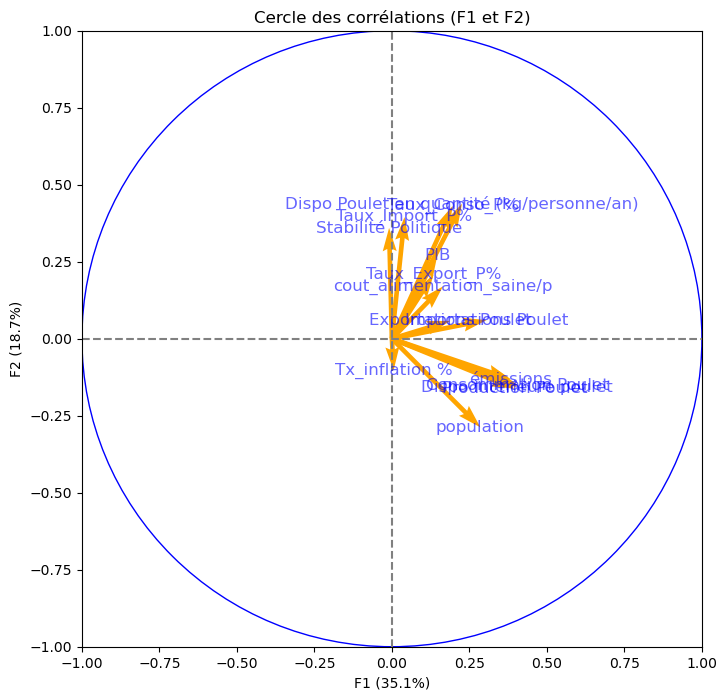

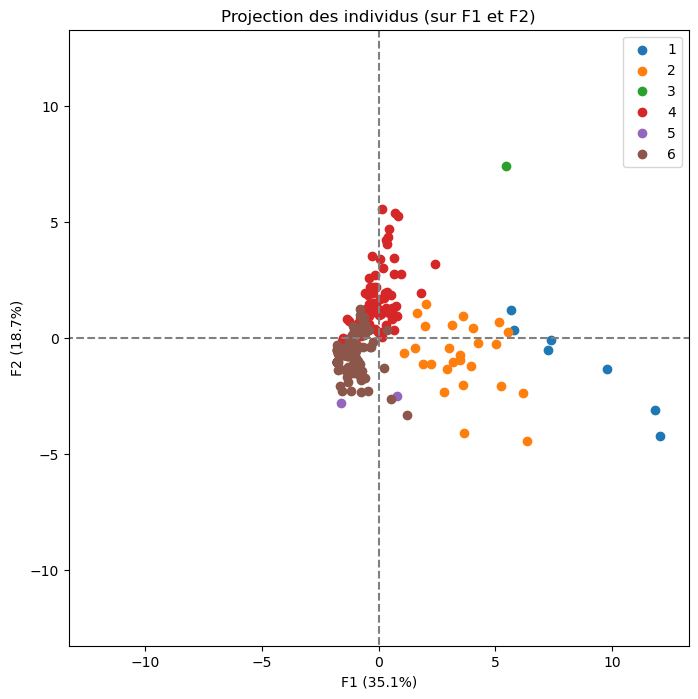

In [312]:
#Définition des variables 
features = poulet.columns
#Calcul des composantes principales (PCs) 
pcs = pca.components_
#Affichage des cercles de corrélation
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
#Transformation des données projetées
X_projected = pca.transform(poulet)
#Affichage des plans factoriels
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels =None, alpha=1, illustrative_var=clusters)

plt.show()

# F3 et F4

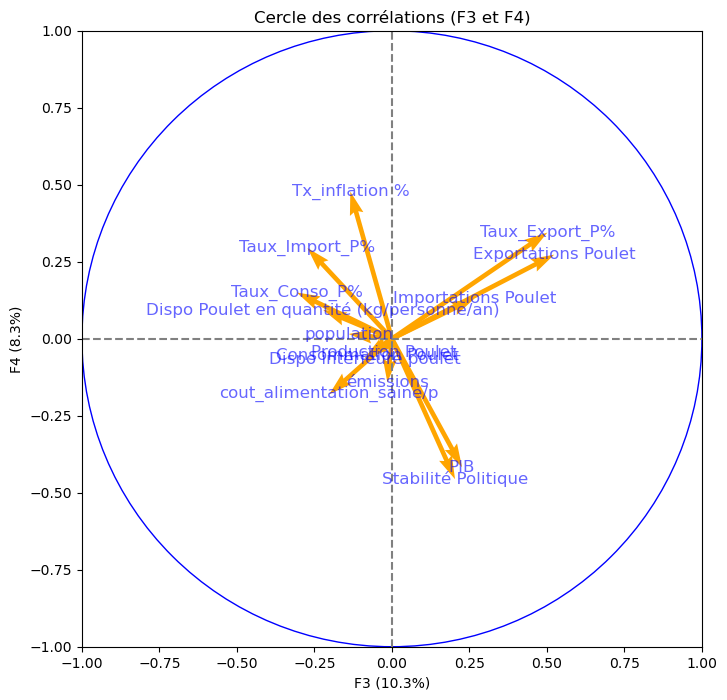

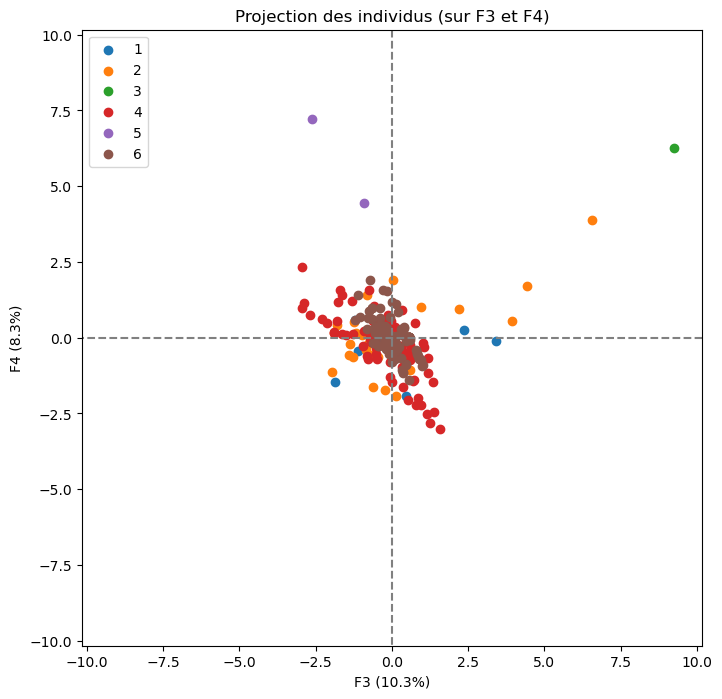

In [313]:
features = poulet.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))
X_projected = pca.transform(poulet)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)], labels =None, alpha=1, illustrative_var=clusters)
plt.show()

# F5 et F6

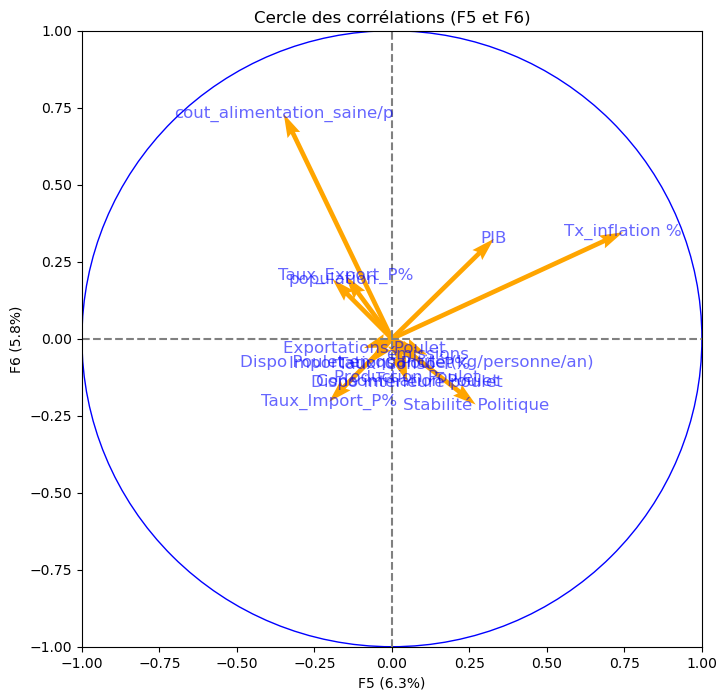

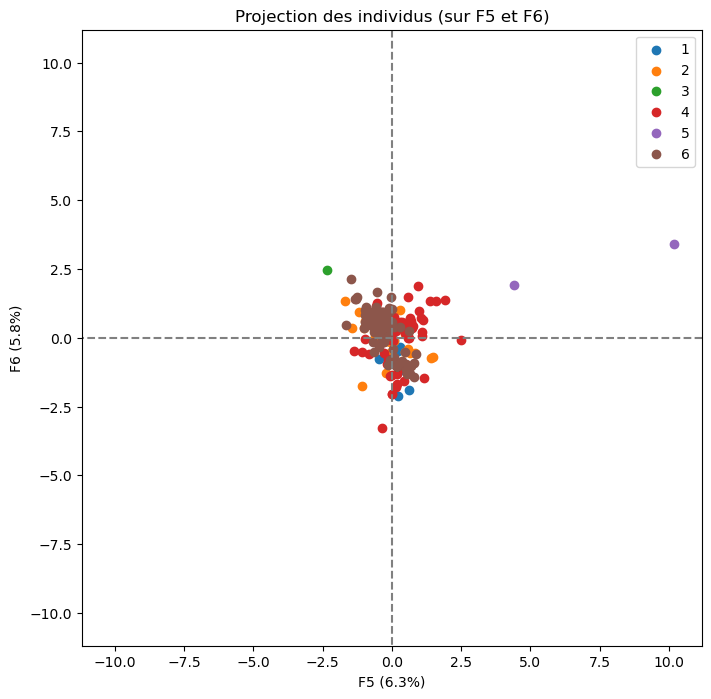

In [314]:
features = poulet.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(4,5)], labels = np.array(features))
X_projected = pca.transform(poulet)
display_factorial_planes(X_projected, n_comp, pca, [(4,5)], labels =None, alpha=1, illustrative_var=clusters)
plt.show()

# 7- K-Means

In [315]:
# Création d'une copie du DataFrame original pour l'imputation des valeurs manquantes
df_imputed = df_neu.copy() 

# Boucle sur les colonnes avec des valeurs manquantes
for column in df_imputed.columns[df_imputed.isnull().any()]:
    # Sélection des variables explicatives (X) et de la variable cible à imputer (y)
    X = df_imputed.drop(column, axis=1)  # Sélection de toutes les colonnes sauf celle à imputer
    y = df_imputed[column]  # Sélection de la colonne à imputer
    
    # Séparation des données en ensembles d'entraînement et de test
    X_train = X[y.notnull()]  # Données non manquantes
    y_train = y[y.notnull()]  # Valeurs correspondantes non manquantes
    X_test = X[y.isnull()]  # Données manquantes
    
    # Création et ajustement du modèle de régression linéaire
    model = LinearRegression()  # Initialisation du modèle de régression linéaire
    model.fit(X_train, y_train)  # Ajustement du modèle aux données d'entraînement
    
    # Prédiction des valeurs manquantes
    y_pred = model.predict(X_test)  # Prédiction des valeurs manquantes
    
    # Imputation des valeurs prédites dans la colonne correspondante du DataFrame
    df_imputed.loc[y.isnull(), column] = y_pred

# Affichage des premières lignes du DataFrame imputé
df_imputed.head()


,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
Zone,,,,,,,,,,,,,,,
Afghanistan,36296113,1.53,57.00,0.00,29.00,55.00,28.00,0.64,0.00,0.42,-2.80,0.00,2096.10,336.05,6.96
Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
Albanie,2884169,16.36,47.00,0.00,38.00,47.00,13.00,4.30,0.00,1.29,0.38,1442.48,12771.00,268.64,3.92
Algérie,41389189,6.38,277.00,0.00,2.00,264.00,275.00,0.01,0.00,0.80,-0.92,1373.50,11809.50,4680.38,5.04
Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76


In [316]:
# Import des modules nécessaires
from sklearn.impute import SimpleImputer  # Pour l'imputation des valeurs manquantes
from sklearn.preprocessing import StandardScaler  # Pour la standardisation des données
from sklearn.decomposition import PCA  # Pour l'analyse en composantes principales

# Définition de la stratégie d'imputation et de la colonne à imputer
strategy = "mean"  # Stratégie d'imputation : remplacement par la moyenne
column_to_impute = "Stabilité Politique"  # Colonne spécifique à imputer

# Copie du DataFrame initial pour éviter de modifier les données originales
df_imputed = df_neu.copy()

# Séparation des données en X (variables indépendantes) et y (variable cible)
X = df_imputed.drop(column_to_impute, axis=1)  # Toutes les colonnes sauf celle à imputer
y = df_imputed[column_to_impute]  # Colonne à imputer

# Imputation des valeurs manquantes dans X avec la stratégie spécifiée
imputer = SimpleImputer(strategy=strategy)  # Création d'un objet imputer
X_imputed = imputer.fit_transform(X)  # Application de l'imputation

# Réassignation des colonnes imputées dans le DataFrame original
df_imputed[X.columns] = X_imputed

# Standardisation des données imputées
scaler = StandardScaler()  # Création d'un objet scaler
X_scaled = scaler.fit_transform(df_imputed)

# Réduction de dimensionnalité avec l'analyse en composantes principales (PCA)
pca = PCA(n_components=2)  # Réduction à 2 dimensions
X_reduced = pca.fit_transform(X_imputed)

# Création d'un nouveau DataFrame avec les données réduites et les mêmes index
df_X_reduced = pd.DataFrame(X_reduced, index=df_imputed.index)


In [317]:
df_X_reduced.head()

,0,1
Zone,,
Afghanistan,18154665.16,-13974.78
Afrique du Sud,38868308.41,-1821.00
Albanie,-15257278.83,-3395.90
Algérie,23247741.37,-4047.82
Allemagne,64516961.65,37717.74


déterminer maintenant le nombre optimal de clusters pour l'algorithme k-means en utilisant la méthode du coude (elbow method).

In [318]:
# Définition de la fonction cluster pour entraîner l'algorithme k-means
def cluster(n_clusters):
    # Création de l'instance de l'algorithme k-means avec le nombre de clusters spécifié
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    # Entraînement de l'algorithme sur les données réduites
    kmeans.fit(X_reduced)
    # Prédiction des clusters pour chaque observation
    Z = kmeans.predict(X_reduced)
    # Retourne l'objet k-means entraîné et les prédictions de clusters
    return kmeans, Z

# Détermination du nombre optimal de clusters en utilisant la méthode du coude
# max_clusters spécifie le nombre maximal de clusters à tester
max_clusters = 20
# Initialisation d'un tableau pour stocker l'inertie pour chaque nombre de clusters
inerties = np.zeros(max_clusters)

# Boucle sur une plage de 1 à max_clusters - 1 pour tester différents nombres de clusters
for i in range(1, max_clusters):
    # Appel de la fonction cluster avec le nombre actuel de clusters
    kmeans, Z = cluster(i)
    # Enregistrement de l'inertie de l'algorithme k-means pour chaque nombre de clusters
    inerties[i] = kmeans.inertia_

# Création d'un graphique de l'inertie en fonction du nombre de clusters
data_kmeans = pgo.Scatter(
    x=np.arange(1, max_clusters),  # Nombre de clusters sur l'axe des x
    y=inerties[1:]  # Inertie sur l'axe des y
)

# Configuration du layout du graphique
layout1 = pgo.Layout(
    title="k-means clustering",  # Titre du graphique
    xaxis=pgo.layout.XAxis(title="Nb clusters", range=[0, max_clusters]),  # Titre et plage de l'axe des x
    yaxis=pgo.layout.YAxis(title="Inertie")  # Titre de l'axe des y
)

# Création de la figure contenant le graphique
fig1 = pgo.Figure(data=data_kmeans, layout=layout1)

# Affichage du graphique
iplot(fig1, filename="clustering-inerties")


En appliquant la méthode du coude et ayant sélectionné 3 clusters à écarter, je sélectionne 3 clusters

In [319]:
df_neu

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
Zone,,,,,,,,,,,,,,,
Afghanistan,36296113,1.53,57.00,0.00,29.00,55.00,28.00,0.64,0.00,0.42,-2.80,0.00,2096.10,336.05,6.96
Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
Albanie,2884169,16.36,47.00,0.00,38.00,47.00,13.00,4.30,0.00,1.29,0.38,1442.48,12771.00,268.64,3.92
Algérie,41389189,6.38,277.00,0.00,2.00,264.00,275.00,0.01,0.00,0.80,-0.92,1373.50,11809.50,4680.38,5.04
Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,636039,4.45,3.00,0.00,6.00,3.00,0.00,4.84,0.00,0.72,0.20,0.00,2625.10,20.41,-0.65
Îles Turques-et-Caïques,37115,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1025.29,0.00,16.35,0.00
Îles Vierges américaines,104751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Travail sur les 3 clusters restants 

In [320]:
#Création du dataframe "df_data3" à partir de "df_data2" en filtrant les clusters depuis "data_clust6"

df_neu.reset_index(inplace = True)

clusters_to_remove = [4, 5, 6]
df
df_data3 = df_neu[~df_neu["Zone"].isin(data_clust6[data_clust6["cluster"].isin(clusters_to_remove)]["Zone"])].copy()
df_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 213
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Zone                                       34 non-null     object 
 1   population                                 34 non-null     int64  
 2   Dispo Poulet en quantité (kg/personne/an)  34 non-null     float64
 3   Dispo intérieure poulet                    34 non-null     float64
 4   Exportations Poulet                        34 non-null     float64
 5   Importations Poulet                        34 non-null     float64
 6   Consommation Poulet                        34 non-null     float64
 7   Production Poulet                          34 non-null     float64
 8   Taux_Import_P%                             34 non-null     float64
 9   Taux_Export_P%                             34 non-null     float64
 10  Taux_Conso_P%              

In [321]:
df_data3

,Zone,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
1,Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
4,Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76
10,Arabie saoudite,33101178,43.36,1435.00,10.00,722.00,1435.00,616.00,2.73,0.45,7.93,-0.64,1255.96,45795.50,13245.29,-0.82
11,Argentine,43937140,42.24,1962.00,207.00,8.00,1856.00,2161.00,0.24,0.33,5.44,0.17,1219.47,23597.10,6318.15,17.67
14,Australie,24584620,47.65,1171.00,42.00,16.00,1171.00,1269.00,0.25,0.08,5.25,0.90,824.54,48400.20,9718.73,0.89
21,Belgique,11419748,12.65,152.00,656.00,338.00,144.00,463.00,0.87,2.02,1.24,0.43,1044.63,50442.30,2184.77,1.27
38,Canada,36732095,39.02,1433.00,163.00,182.00,1433.00,1417.00,0.93,0.25,4.22,1.10,1044.99,48317.20,18779.48,-0.98
39,Chili,18470439,36.36,672.00,115.00,155.00,672.00,712.00,2.20,1.32,5.38,0.42,1114.34,24546.90,2833.67,2.03
40,Chine - RAS de Hong-Kong,7306322,53.51,280.00,663.00,907.00,391.00,24.00,9.40,18.37,6.89,0.83,1335.54,59842.20,857.24,4.73
42,"Chine, Taiwan Province de",23674546,33.17,785.00,8.00,161.00,785.00,652.00,1.12,0.48,5.18,0.00,1456.35,0.00,4008.98,0.00


In [322]:
null_stability = df_data3[df_data3["Stabilité Politique"].isnull()]
print(null_stability)

Empty DataFrame
Columns: [Zone, population, Dispo Poulet en quantité (kg/personne/an), Dispo intérieure poulet, Exportations Poulet, Importations Poulet, Consommation Poulet, Production Poulet, Taux_Import_P%, Taux_Export_P%, Taux_Conso_P%, Stabilité Politique, cout_alimentation_saine/p, PIB, émissions, Tx_inflation %]
Index: []


In [323]:
df_data3 = df_data3.set_index("Zone")

In [324]:
df = df_data3
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.finfo(np.float64).max)

x = df.columns.tolist()
z =df[x].corr()

hovercell = list()
for yi, yy in enumerate(x):
    hovercell.append(list())
    for xi, xx in enumerate(x):
        hovercell[-1].append("X: {}<br />Y: {}<br />Corr:{}".format(xx, yy, round(stats.pearsonr(df[xx],df[yy])[0],2)))
        
map = [go.Heatmap(z=z, x=x, y=x,
                 xgap=1, ygap=1,
                 colorbar_thickness=20,
                 colorbar_ticklen=3,
                 hoverinfo='text',
                 text=hovercell)] 
                 
title = "Matrice de corrélation"

layout = go.Layout(title_text=title, title_x=0.5,
                   width= 950, height = 800,
                   xaxis_showgrid = False,
                   yaxis_showgrid = False, 
                   yaxis_autorange = "reversed")

fig = go.Figure(data = map, layout = layout)
iplot(fig, filename = "pandas-heatmap") 

### Dendrogramme

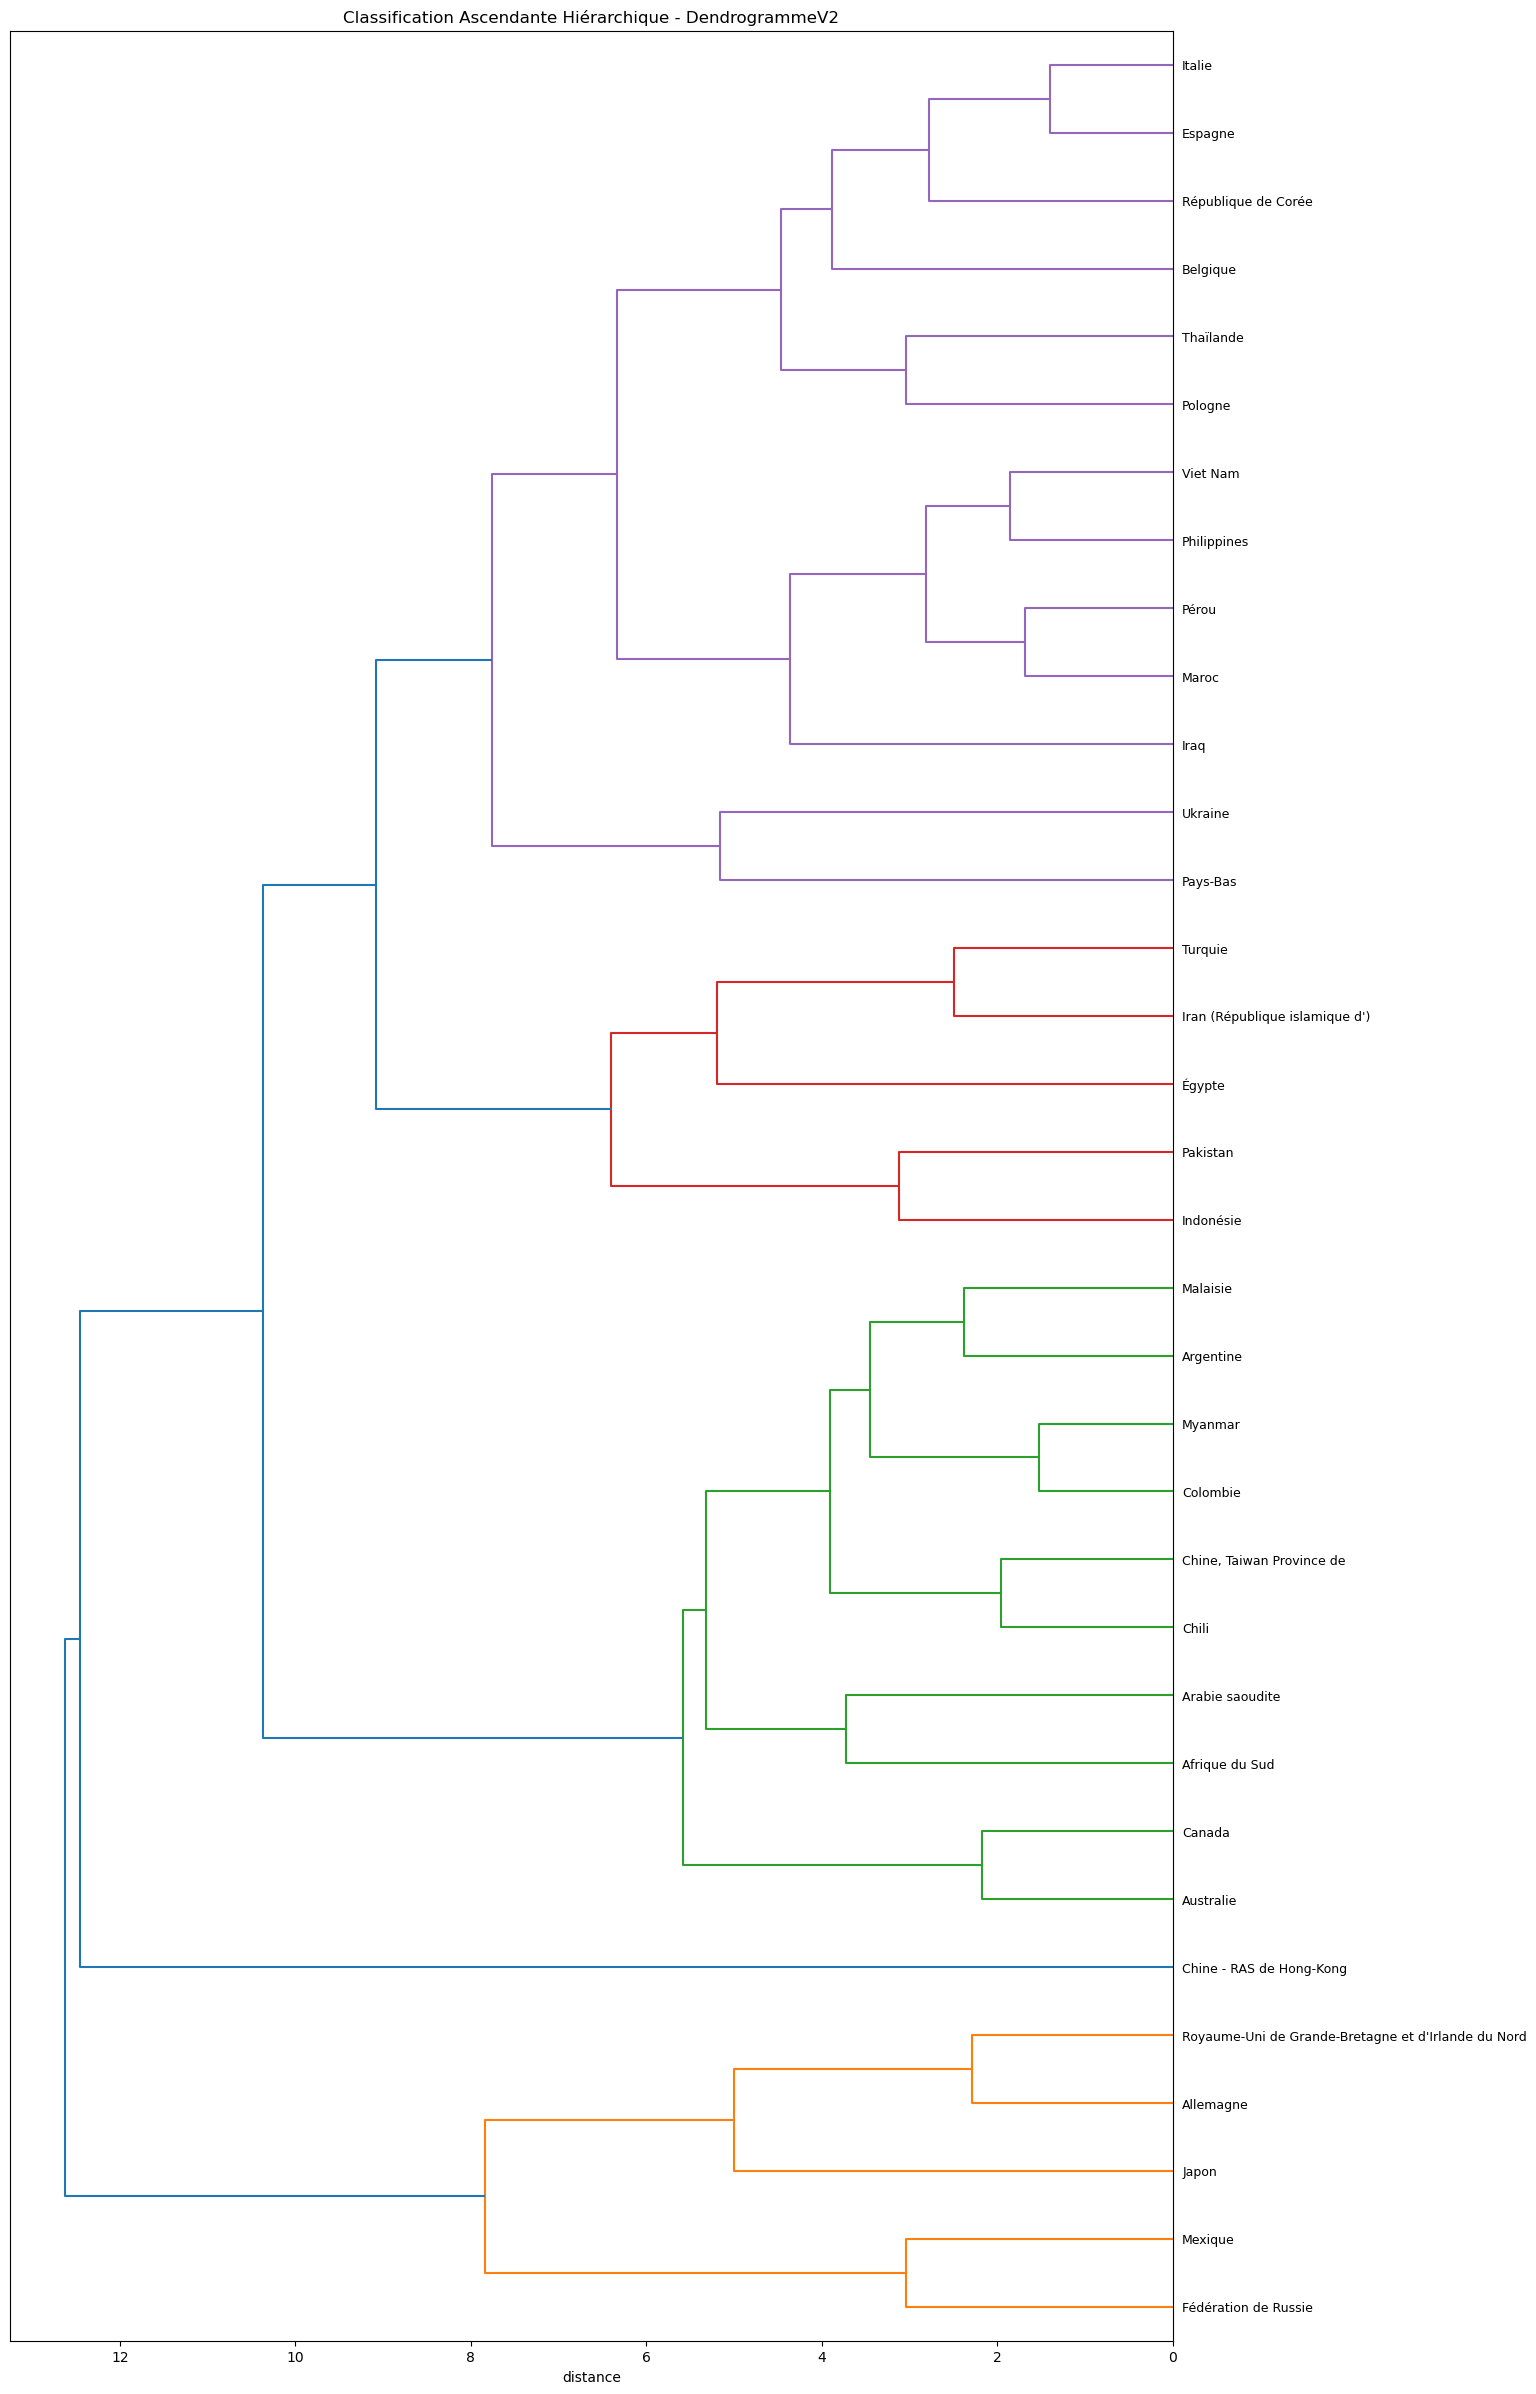

In [325]:
def clust_dendrogramV3(Z,names):  
    plt.figure(figsize=(15,30))    
    plt.axvline(x=13.3,color="black", linestyle="dashed")   
    plt.axvline(x=15, color ="orange", linestyle="dashed")
    plt.title("Classification Ascendante Hiérarchique - DendrogrammeV2")    
    plt.xlabel("distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp", 
        orientation = "left", 
        p=96,                
        leaf_font_size = 9    
    )
    plt.show()     
X = df_data3.values    
X[np.isinf(X)] = np.nan 
X = np.nan_to_num(X)    
names = df_data3.index 

std_scale = preprocessing.StandardScaler().fit(X)   
    
X_scaled = std_scale.transform(X)

Z = linkage(X_scaled, "ward", metric = "euclidean")          

clust_dendrogramV3(Z,names)

### Dendrogramme sur 6 lignes 

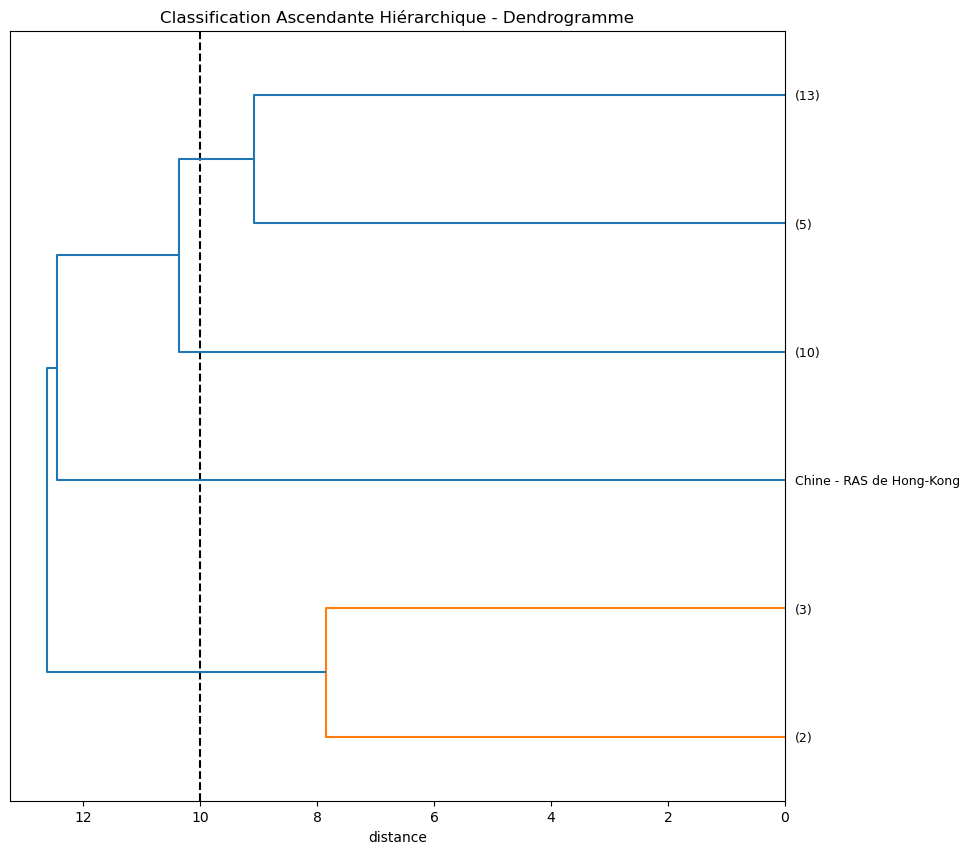

In [326]:
def clust_dendrogram7(Z,names):  
    plt.figure(figsize=(10,10))    
    plt.axvline(x=10,color="black", linestyle="dashed")  
    plt.axvline(x=20, color ="orange", linestyle="dashed")
    plt.title("Classification Ascendante Hiérarchique - Dendrogramme")    
    plt.xlabel("distance")
    dendrogram(               
        Z,                    
        labels = names,       
        truncate_mode="lastp",
        orientation = "left", 
        p=6,                
        leaf_font_size = 9    
    )
    plt.show()     
       
clust_dendrogram7(Z,names)

 # Analyse en Composantes Principales (ACP)

### définition de l'affichage du tracé d'éboulis des valeurs propres 

In [327]:
def display_scree_eigenvalues(pca):        
    # Calcul des pourcentages d'inertie (variance expliquée) pour chaque composante principale
    scree = pca.explained_variance_ratio_ * 100   
    # Création d'un graphique en barres pour représenter les pourcentages d'inertie de chaque composante
    plt.bar(np.arange(len(scree)) + 1, scree)     
    # Tracé d'une courbe cumulative reliant les pourcentages d'inertie cumulés
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker="o")  
    # Définition du titre de l'axe des x
    plt.xlabel("Rang de l'axe d'inertie")    
    # Définition du titre de l'axe des y
    plt.ylabel("% Inertie")
    # Définition du titre du graphique
    plt.title("Eboulis des valeurs propres")
    # Affichage du graphique sans bloquer l'exécution du code
    plt.show(block=False)


In [328]:
n_comp = 15            # Nombre de composantes principales à conserver
data_pca = df_data3    # Données pour l'analyse en composantes principales (ACP)
data_pca = data_pca.fillna(0)  # Remplissage des valeurs manquantes par zéro
X = data_pca.values     # Conversion des données en un tableau NumPy
names = df_data3.index  # Noms des individus ou des observations
features = data_pca.columns   # Noms des variables
std_scale = preprocessing.StandardScaler().fit(X)  # Standardisation des données
X_scaled = std_scale.transform(X)  # Transformation des données standardisées
pca = decomposition.PCA(n_components=n_comp)  # Création d'un objet PCA avec le nombre de composantes spécifié
pca.fit(X_scaled)  # Ajustement de l'ACP aux données standardisées


PCA(n_components=15)

In [329]:
#créé un nouveau DataFrame poulet3 contenant les données mises à l'échelle à l'aide de StandardScaler
poulet3 = pd.DataFrame(X_scaled,
                     index = df_data3.index,
                     columns = df_data3.columns)

In [330]:
pca.explained_variance_ratio_

array([0.28413536, 0.22840171, 0.11062254, 0.09877569, 0.09263814,
       0.06010572, 0.04349211, 0.02771634, 0.02010325, 0.01377836,
       0.00945484, 0.00696962, 0.00247181, 0.00081957, 0.00051493])

In [331]:
#les sommes cumulées des pourcentages de variance expliquée par les composantes principales
pca.explained_variance_ratio_.cumsum()

array([0.28413536, 0.51253707, 0.62315961, 0.7219353 , 0.81457344,
       0.87467916, 0.91817127, 0.94588761, 0.96599087, 0.97976922,
       0.98922407, 0.99619369, 0.9986655 , 0.99948507, 1.        ])

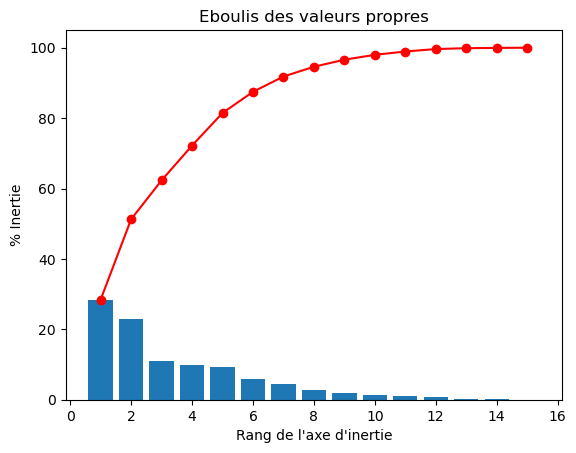

In [332]:
display_scree_eigenvalues(pca)

Je vais choisir 6 composantes principales, car ces premières dimensions représentent près de 87 % des informations importantes

In [333]:
# attribuer des clusters aux données
clusters = fcluster(Z,6, criterion = "maxclust") #  
classes6_3 = pd.DataFrame({"cluster": clusters,"Zone":names})
print(classes6_3)

    cluster                                               Zone
0         3                                     Afrique du Sud
1         2                                          Allemagne
2         3                                    Arabie saoudite
3         3                                          Argentine
4         3                                          Australie
5         5                                           Belgique
6         3                                             Canada
7         3                                              Chili
8         6                           Chine - RAS de Hong-Kong
9         3                          Chine, Taiwan Province de
10        3                                           Colombie
11        5                                            Espagne
12        1                               Fédération de Russie
13        4                                          Indonésie
14        4                     Iran (République islami

In [334]:
#effectuer une analyse de clustering sur les données avec les moyennes des variables standardisées pour chaque cluster
classes_clust3 = classes6_3.set_index("Zone")
data_clust6_3 = pd.merge(poulet3, classes6_3, on=["Zone"], how="outer")
result_clustering6_3 = data_clust6_3.drop("Zone", axis=1).groupby("cluster").mean()
result_clustering6_3


,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
cluster,,,,,,,,,,,,,,,
1,1.24,0.49,3.12,-0.47,1.00,3.17,2.77,0.07,-0.35,0.19,-0.46,-0.05,-0.11,1.72,0.05
2,0.45,-0.22,0.67,0.35,1.93,0.68,0.42,0.20,0.05,-0.37,1.08,0.24,1.29,1.39,-0.35
3,-0.56,1.01,-0.06,-0.46,-0.27,-0.05,-0.17,0.00,-0.27,1.14,0.32,0.15,0.01,-0.08,-0.13
4,1.44,-0.93,0.26,-0.37,-0.79,0.25,0.38,-0.68,-0.20,-0.88,-1.20,0.24,-0.64,0.21,1.26
5,-0.33,-0.62,-0.58,0.39,-0.24,-0.61,-0.40,-0.11,-0.10,-0.63,-0.06,-0.30,-0.20,-0.51,-0.31
6,-1.11,2.32,-1.34,1.31,1.97,-1.15,-1.73,4.10,5.47,1.84,1.23,0.52,2.04,-1.20,0.03


### Visualisation des 6 clusters depuis un clustermap 

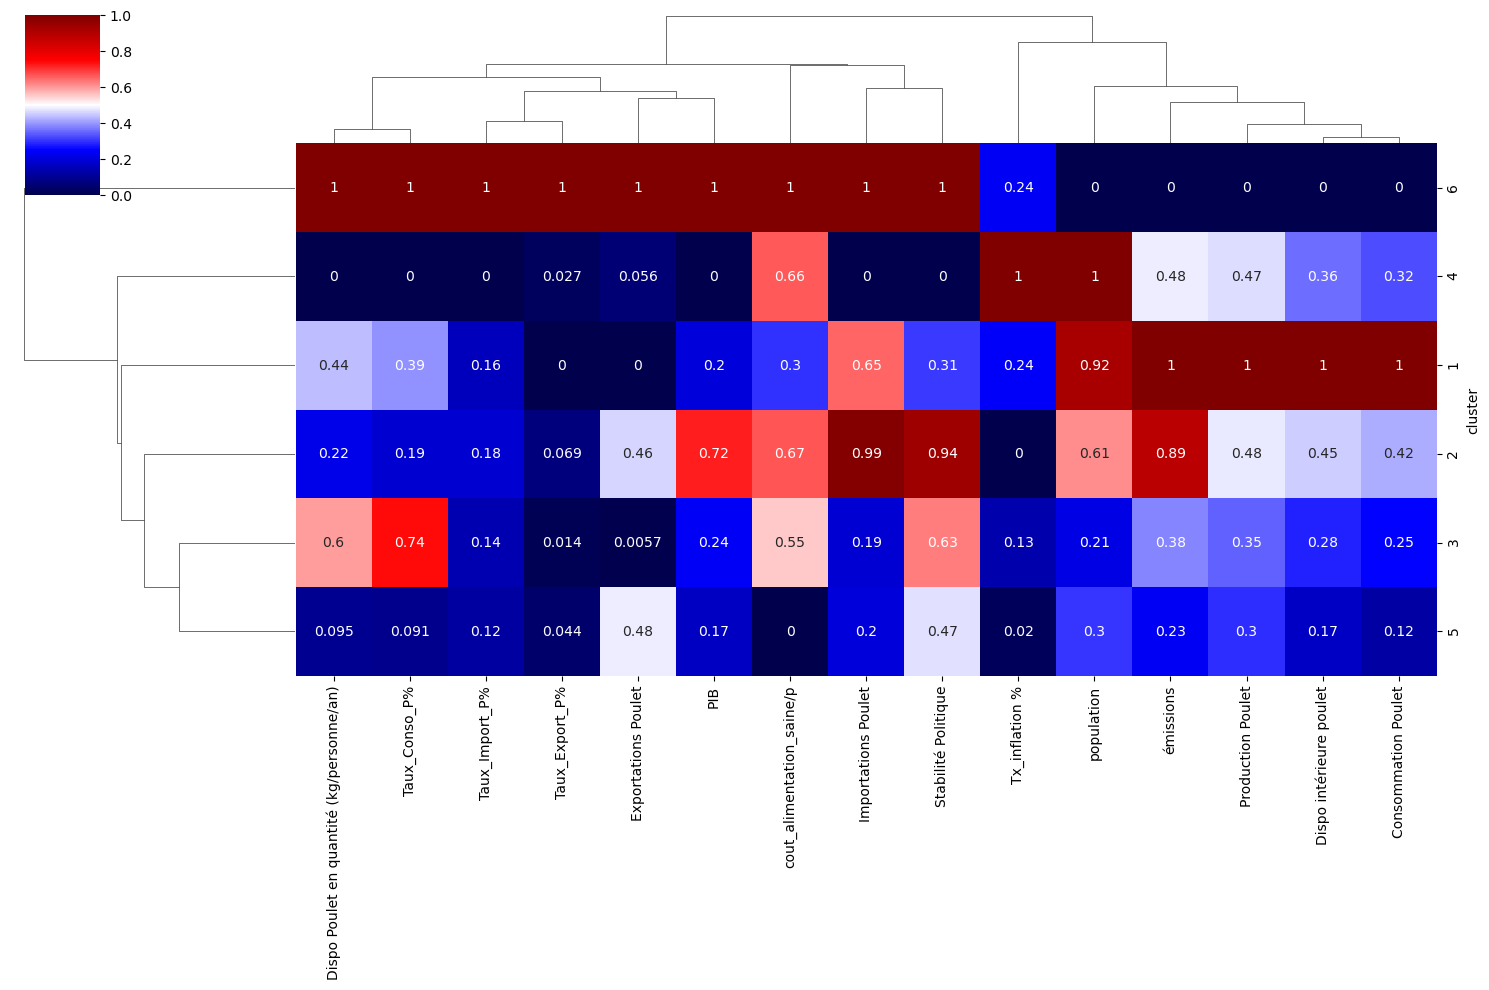

In [335]:
clustermap = sns.clustermap(result_clustering6_3, figsize = (15,10), annot = True, standard_scale =1, cmap="seismic")
annot_data = clustermap.data2d
df_annot = pd.DataFrame(annot_data)
plt.show()

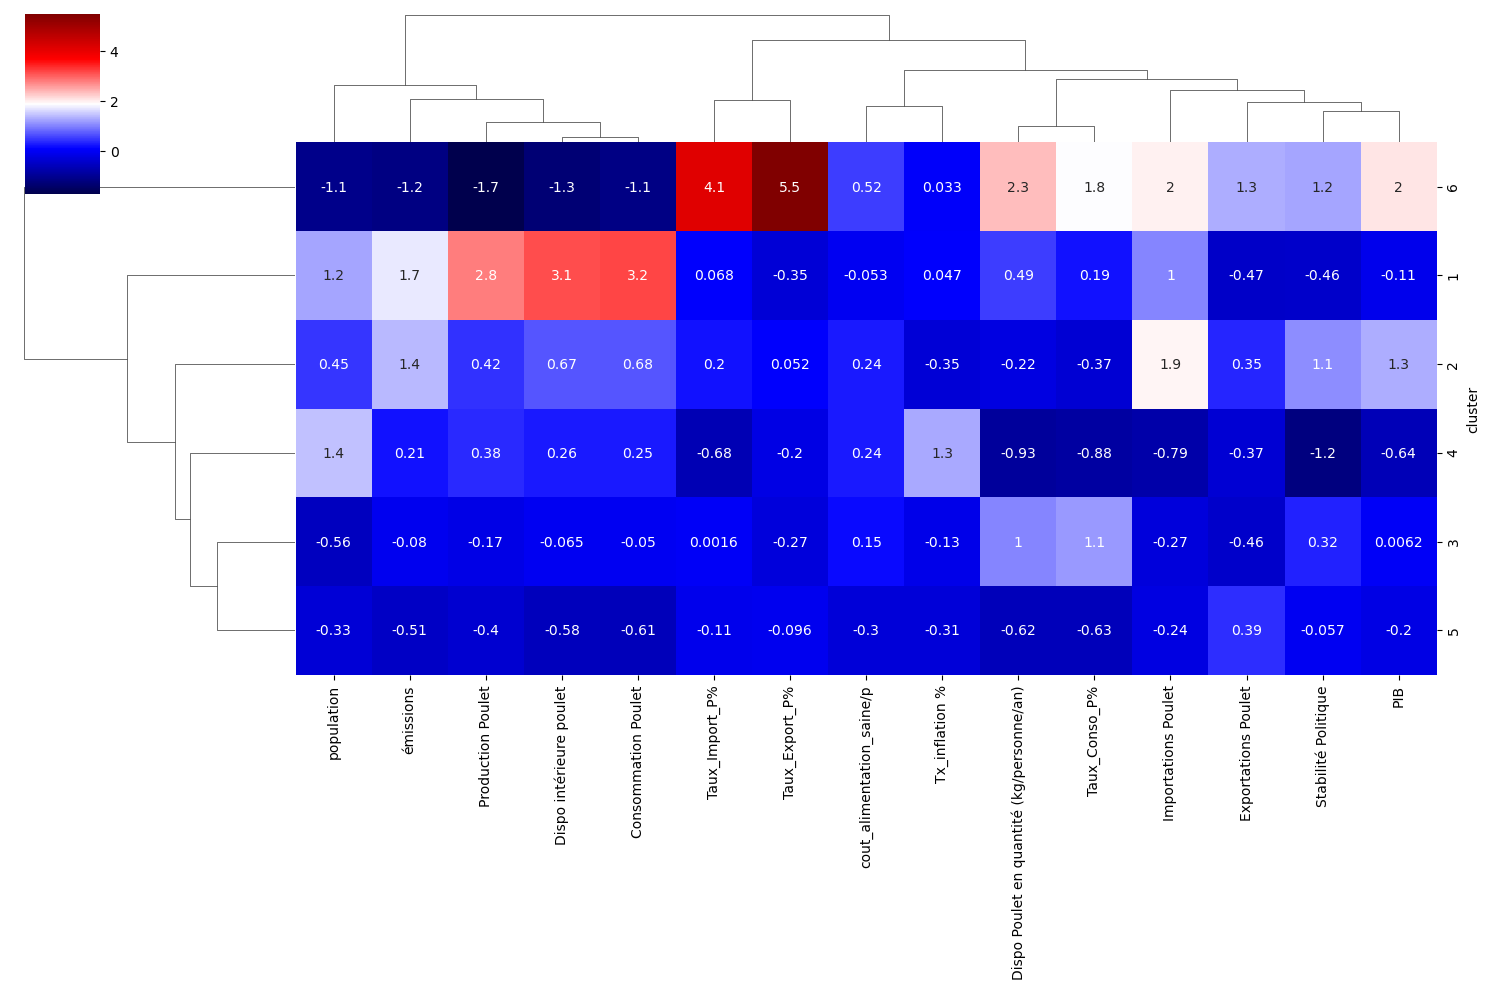

In [336]:
clustermap = sns.clustermap(result_clustering6_3, figsize = (15,10), annot = True, standard_scale =None, cmap="seismic")

In [337]:
df_annot

,Dispo Poulet en quantité (kg/personne/an),Taux_Conso_P%,Taux_Import_P%,Taux_Export_P%,Exportations Poulet,PIB,cout_alimentation_saine/p,Importations Poulet,Stabilité Politique,Tx_inflation %,population,émissions,Production Poulet,Dispo intérieure poulet,Consommation Poulet
cluster,,,,,,,,,,,,,,,
6,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.24,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.03,0.06,0.00,0.66,0.00,0.00,1.00,1.00,0.48,0.47,0.36,0.32
1,0.44,0.39,0.16,0.00,0.00,0.20,0.30,0.65,0.31,0.24,0.92,1.00,1.00,1.00,1.00
2,0.22,0.19,0.18,0.07,0.46,0.72,0.67,0.99,0.94,0.00,0.61,0.89,0.48,0.45,0.42
3,0.60,0.74,0.14,0.01,0.01,0.24,0.55,0.19,0.63,0.13,0.21,0.38,0.35,0.28,0.25
5,0.09,0.09,0.12,0.04,0.48,0.17,0.00,0.20,0.47,0.02,0.30,0.23,0.30,0.17,0.12


#### Visualisation de la répartition des valeurs dans les clusters 

In [338]:
def map_to_categories(value):
     
    if value >= 0.7:
        return "Forte"
    elif value > 0.3 and value < 0.7: 
        return "Moyenne"
    else :
        return "Faible"
    
columns_by_cluster = {}
# Application de la fonction map_to_categories à chaque colonne de "result_clustering6"
for col in df_annot.columns:  # ignore les colonnes pays et cluster
    if col in columns_to_process and isinstance(df_annot[col], pd.Series):
        df_annot[col + "_cat"] = df_annot[col].apply(map_to_categories)
    
grouped_data = df_annot.groupby("cluster") # Regroupement des données par cluster

for cluster, group in grouped_data:
    columns_by_cluster[cluster] = {}
    
    for category in ['Forte', 'Moyenne', 'Faible']:
        columns_with_category = [col.replace("_cat", "") for col in group.columns if group[col].iloc[0] == category]
        columns_by_cluster[cluster][category] = columns_with_category

for cluster, columns_dict in columns_by_cluster.items():
        print("\n","cluster {}:".format(cluster))
        for category, columns_list in columns_dict.items():
            print(" valeurs {} : {}".format(category, ", ".join(columns_list)))


 cluster 1:
 valeurs Forte : population, émissions, Production Poulet, Dispo intérieure poulet, Consommation Poulet
 valeurs Moyenne : Dispo Poulet en quantité (kg/personne/an), Taux_Conso_P%, cout_alimentation_saine/p, Importations Poulet, Stabilité Politique
 valeurs Faible : Taux_Import_P%, Taux_Export_P%, Exportations Poulet, PIB, Tx_inflation %

 cluster 2:
 valeurs Forte : PIB, Importations Poulet, Stabilité Politique, émissions
 valeurs Moyenne : Exportations Poulet, cout_alimentation_saine/p, population, Production Poulet, Dispo intérieure poulet, Consommation Poulet
 valeurs Faible : Dispo Poulet en quantité (kg/personne/an), Taux_Conso_P%, Taux_Import_P%, Taux_Export_P%, Tx_inflation %

 cluster 3:
 valeurs Forte : Taux_Conso_P%
 valeurs Moyenne : Dispo Poulet en quantité (kg/personne/an), cout_alimentation_saine/p, Stabilité Politique, émissions, Production Poulet
 valeurs Faible : Taux_Import_P%, Taux_Export_P%, Exportations Poulet, PIB, Importations Poulet, Tx_inflation %

In [339]:
columns_clusters = {column: {"Forte": [], "Moyenne": [], "Faible": []} for column in columns_to_process}

for cluster, columns_dict in columns_by_cluster.items():
    for category, column_list in columns_dict.items():
        for column in column_list:
            columns_clusters[column][category].append(cluster)

def format_columns_clusters_markdown_table(cluster_data):
    markdown = "| Colonnes | Valeurs Fortes (Clusters) | Valeurs Moyennes (Clusters) | Valeurs Faibles (Clusters) |\n"
    markdown += "|:--------:|:------------------------:|:-------------------------:|:-----------------------:|\n"
    for column, clusters_dict in cluster_data.items():
        forte_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Forte'])
        moyenne_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Moyenne'])
        faible_clusters = ', '.join(str(cluster) for cluster in clusters_dict['Faible'])
        markdown += "| {} | {} | {} | {} |\n".format(column, forte_clusters, moyenne_clusters, faible_clusters)
        markdown += "\n"  # Add a newline between each column's rows
    return markdown

print(format_columns_clusters_markdown_table(columns_clusters))

| Colonnes | Valeurs Fortes (Clusters) | Valeurs Moyennes (Clusters) | Valeurs Faibles (Clusters) |
|:--------:|:------------------------:|:-------------------------:|:-----------------------:|
| population | 1, 4 | 2, 5 | 3, 6 |

| Dispo Poulet en quantité (kg/personne/an) | 6 | 1, 3 | 2, 4, 5 |

| Dispo intérieure poulet | 1 | 2, 4 | 3, 5, 6 |

| Exportations Poulet | 6 | 2, 5 | 1, 3, 4 |

| Importations Poulet | 2, 6 | 1 | 3, 4, 5 |

| Consommation Poulet | 1 | 2, 4 | 3, 5, 6 |

| Production Poulet | 1 | 2, 3, 4 | 5, 6 |

| Taux_Import_P% | 6 |  | 1, 2, 3, 4, 5 |

| Taux_Export_P% | 6 |  | 1, 2, 3, 4, 5 |

| Taux_Conso_P% | 3, 6 | 1 | 2, 4, 5 |

| Stabilité Politique | 2, 6 | 1, 3, 5 | 4 |

| cout_alimentation_saine/p | 6 | 1, 2, 3, 4 | 5 |

| PIB | 2, 6 |  | 1, 3, 4, 5 |

| émissions | 1, 2 | 3, 4 | 5, 6 |

| Tx_inflation % | 4 |  | 1, 2, 3, 5, 6 |




In [340]:
colonnes_interet = ['population', 'Dispo Poulet en quantité (kg/personne/an)', 'Dispo intérieure poulet', 
                    'Exportations Poulet', 'Importations Poulet', 'Consommation Poulet', 'Production Poulet', 'Taux_Import_P%', 
                    'Taux_Export_P%', 'Taux_Conso_P%', 'Stabilité Politique', 'cout_alimentation_saine/p', 'PIB', 
                    'émissions', 'Tx_inflation %']

for colonne in colonnes_interet:
    colonne_triee = df_annot.sort_values(colonne, ascending=False)
    
    meilleurs_clusters = colonne_triee.index[:3]
    
    labels_clusters = [f"Cluster {i}" for i in meilleurs_clusters]
    
    print(f"L'indicateur \"{colonne}\" est le mieux représenté dans les clusters : {', '.join(labels_clusters)}")

L'indicateur "population" est le mieux représenté dans les clusters : Cluster 4, Cluster 1, Cluster 2
L'indicateur "Dispo Poulet en quantité (kg/personne/an)" est le mieux représenté dans les clusters : Cluster 6, Cluster 3, Cluster 1
L'indicateur "Dispo intérieure poulet" est le mieux représenté dans les clusters : Cluster 1, Cluster 2, Cluster 4
L'indicateur "Exportations Poulet" est le mieux représenté dans les clusters : Cluster 6, Cluster 5, Cluster 2
L'indicateur "Importations Poulet" est le mieux représenté dans les clusters : Cluster 6, Cluster 2, Cluster 1
L'indicateur "Consommation Poulet" est le mieux représenté dans les clusters : Cluster 1, Cluster 2, Cluster 4
L'indicateur "Production Poulet" est le mieux représenté dans les clusters : Cluster 1, Cluster 2, Cluster 4
L'indicateur "Taux_Import_P%" est le mieux représenté dans les clusters : Cluster 6, Cluster 2, Cluster 1
L'indicateur "Taux_Export_P%" est le mieux représenté dans les clusters : Cluster 6, Cluster 2, Cluste

In [341]:
meilleures_colonnes = ['population', 'PIB', 'Stabilité Politique', 'Production Poulet', 
                       'Importations Poulet', 'Exportations Poulet','Consommation Poulet']
moins_bonnes_colonnes = ['cout_alimentation_saine/p', 'Tx_inflation %', 'émissions', 
                         'Dispo intérieure poulet', 'Dispo Poulet en quantité (kg/personne/an)']

df_annot['moyenne_meilleures'] = df_annot[meilleures_colonnes].mean(axis=1)

df_annot['moyenne_moins_bonnes'] = df_annot[moins_bonnes_colonnes].mean(axis=1)

indices_meilleures = df_annot['moyenne_meilleures'].nlargest(3).index.tolist()
indices_moins_bonnes = df_annot['moyenne_meilleures'].nsmallest(3).index.tolist()

indices_meilleures_moins_bonnes = df_annot['moyenne_moins_bonnes'].nlargest(3).index.tolist()
indices_moins_bonnes_moins_bonnes = df_annot['moyenne_moins_bonnes'].nsmallest(3).index.tolist()

meilleurs_clusters = [str(cluster) for cluster in indices_meilleures]
moins_bons_clusters = [str(cluster) for cluster in indices_moins_bonnes]
meilleurs_clusters_moins_bons = [str(cluster) for cluster in indices_meilleures_moins_bonnes]
moins_bons_clusters_moins_bons = [str(cluster) for cluster in indices_moins_bonnes_moins_bonnes]

phrase_finale = f"Les 3 clusters ayant les meilleures moyennes sur les colonnes \"{', '.join(meilleures_colonnes)}\" sont les clusters \"{', '.join(meilleurs_clusters)}\".\n" \
               f"Les 3 clusters ayant les meilleures moyennes sur les colonnes \"{', '.join(moins_bonnes_colonnes)}\" sont les clusters \"{', '.join(meilleurs_clusters_moins_bons)}\"."

print(phrase_finale)

Les 3 clusters ayant les meilleures moyennes sur les colonnes "population, PIB, Stabilité Politique, Production Poulet, Importations Poulet, Exportations Poulet, Consommation Poulet" sont les clusters "2, 1, 6".
Les 3 clusters ayant les meilleures moyennes sur les colonnes "cout_alimentation_saine/p, Tx_inflation %, émissions, Dispo intérieure poulet, Dispo Poulet en quantité (kg/personne/an)" sont les clusters "1, 4, 6".


###  Listing des pays par cluster

In [342]:
df_par_cluster6_3 = {}
for cluster in classes6_3["cluster"].unique():
    cluster_df6_3 = classes6_3[classes6_3["cluster"] == cluster].copy()
    nom_df6_3 = f"cluster{cluster}"
    df_par_cluster6_3[nom_df6_3] = cluster_df6_3
    
for nom_df6_3, df_clust6_3 in df_par_cluster6_3.items():
    print(f"cluster {nom_df6_3}:")
    print(df_clust6_3)
    print()

cluster cluster3:
    cluster                       Zone
0         3             Afrique du Sud
2         3            Arabie saoudite
3         3                  Argentine
4         3                  Australie
6         3                     Canada
7         3                      Chili
9         3  Chine, Taiwan Province de
10        3                   Colombie
18        3                   Malaisie
21        3                    Myanmar

cluster cluster2:
    cluster                                               Zone
1         2                                          Allemagne
17        2                                              Japon
27        2  Royaume-Uni de Grande-Bretagne et d'Irlande du...

cluster cluster5:
    cluster                 Zone
5         5             Belgique
11        5              Espagne
15        5                 Iraq
16        5               Italie
19        5                Maroc
23        5             Pays-Bas
24        5          Philippines

### Cluster 1 = (2 pays)

In [343]:
print(df_par_cluster6_3["cluster1"], 'nb_pays:', len(df_par_cluster6_3["cluster1"]), df_par_cluster6_3["cluster1"]["Zone"].tolist())

    cluster                  Zone
12        1  Fédération de Russie
20        1               Mexique nb_pays: 2 ['Fédération de Russie', 'Mexique']


### Cluster 2 = (3 pays)

In [344]:
print(df_par_cluster6_3["cluster2"], 'nb_pays:', len(df_par_cluster6_3["cluster2"]), df_par_cluster6_3["cluster2"]["Zone"].tolist())

    cluster                                               Zone
1         2                                          Allemagne
17        2                                              Japon
27        2  Royaume-Uni de Grande-Bretagne et d'Irlande du... nb_pays: 3 ['Allemagne', 'Japon', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


### Cluster 3 = (10 pays) 

In [345]:
print(df_par_cluster6_3["cluster3"], 'nb_pays:', len(df_par_cluster6_3["cluster3"]), df_par_cluster6_3["cluster3"]["Zone"].tolist())

    cluster                       Zone
0         3             Afrique du Sud
2         3            Arabie saoudite
3         3                  Argentine
4         3                  Australie
6         3                     Canada
7         3                      Chili
9         3  Chine, Taiwan Province de
10        3                   Colombie
18        3                   Malaisie
21        3                    Myanmar nb_pays: 10 ['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Australie', 'Canada', 'Chili', 'Chine, Taiwan Province de', 'Colombie', 'Malaisie', 'Myanmar']


### Cluster 4 = (5 pays) 

In [346]:
print(df_par_cluster6_3["cluster4"], 'nb_pays:', len(df_par_cluster6_3["cluster4"]), df_par_cluster6_3["cluster4"]["Zone"].tolist())

    cluster                            Zone
13        4                       Indonésie
14        4  Iran (République islamique d')
22        4                        Pakistan
30        4                         Turquie
33        4                          Égypte nb_pays: 5 ['Indonésie', "Iran (République islamique d')", 'Pakistan', 'Turquie', 'Égypte']


### Cluster 5 = (13 pays)  

In [347]:
print(df_par_cluster6_3["cluster5"], 'nb_pays:', len(df_par_cluster6_3["cluster5"]), df_par_cluster6_3["cluster5"]["Zone"].tolist())

    cluster                 Zone
5         5             Belgique
11        5              Espagne
15        5                 Iraq
16        5               Italie
19        5                Maroc
23        5             Pays-Bas
24        5          Philippines
25        5              Pologne
26        5                Pérou
28        5  République de Corée
29        5            Thaïlande
31        5              Ukraine
32        5             Viet Nam nb_pays: 13 ['Belgique', 'Espagne', 'Iraq', 'Italie', 'Maroc', 'Pays-Bas', 'Philippines', 'Pologne', 'Pérou', 'République de Corée', 'Thaïlande', 'Ukraine', 'Viet Nam']


### Cluster 6 = (1 pays)   

In [348]:
print(df_par_cluster6_3["cluster6"], 'nb_pays:', len(df_par_cluster6_3["cluster6"]), df_par_cluster6_3["cluster6"]["Zone"].tolist())

   cluster                      Zone
8        6  Chine - RAS de Hong-Kong nb_pays: 1 ['Chine - RAS de Hong-Kong']


## cercles des corrélations et plans factoriels¶
### Composantes F1 et F2 

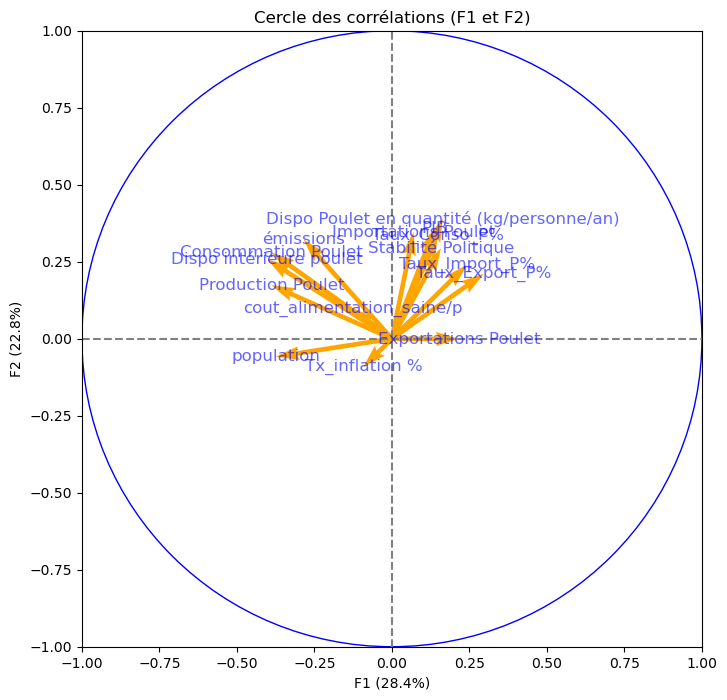

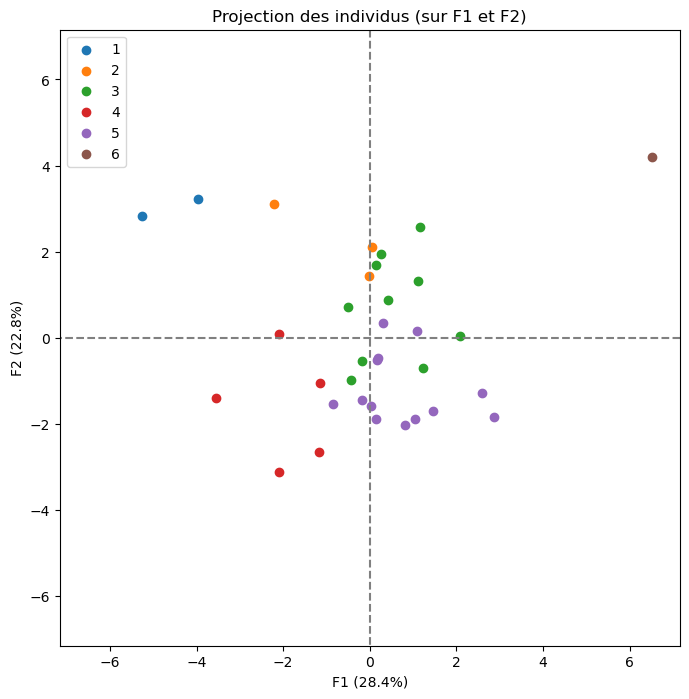

In [349]:
features = poulet3.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

X_projected = pca.transform(poulet3)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels =None, alpha=1, illustrative_var=clusters)

plt.show()

### F3 et F4 

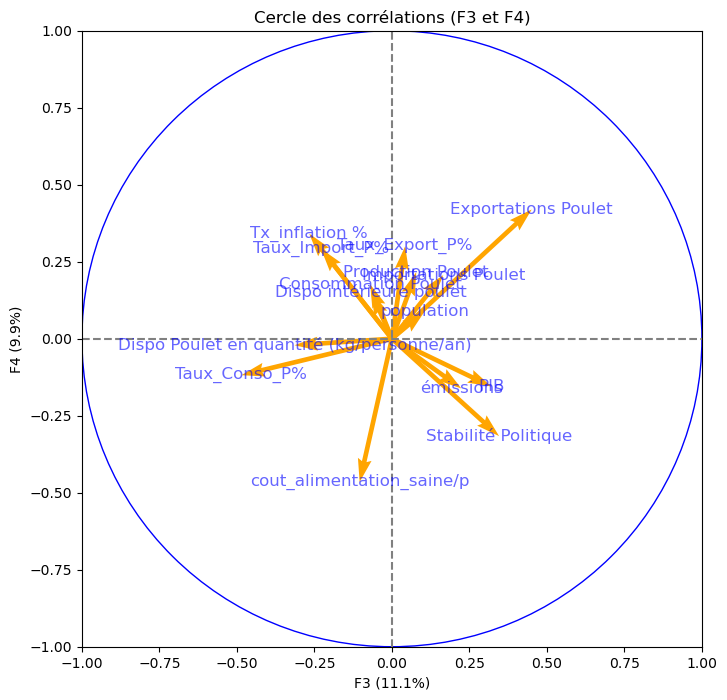

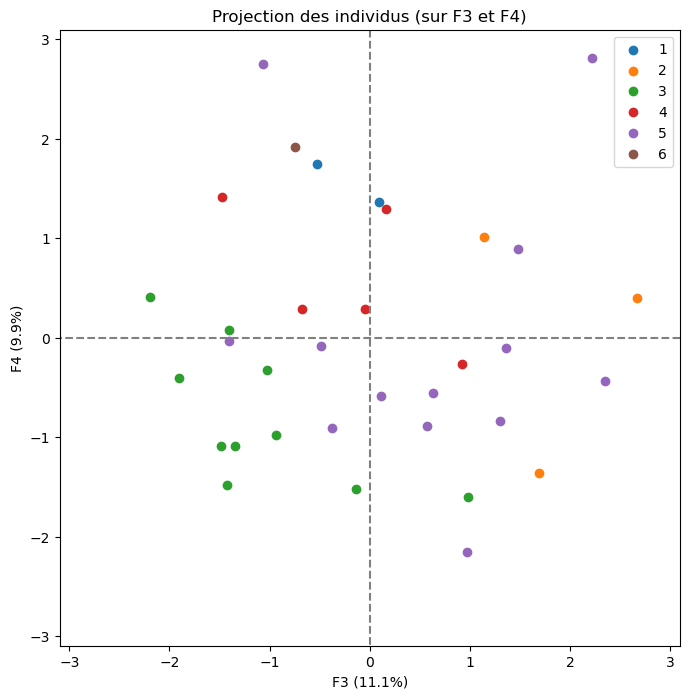

In [350]:
features = poulet3.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

X_projected = pca.transform(poulet3)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)], labels =None, alpha=1, illustrative_var=clusters)

plt.show()

### F5 et F6 

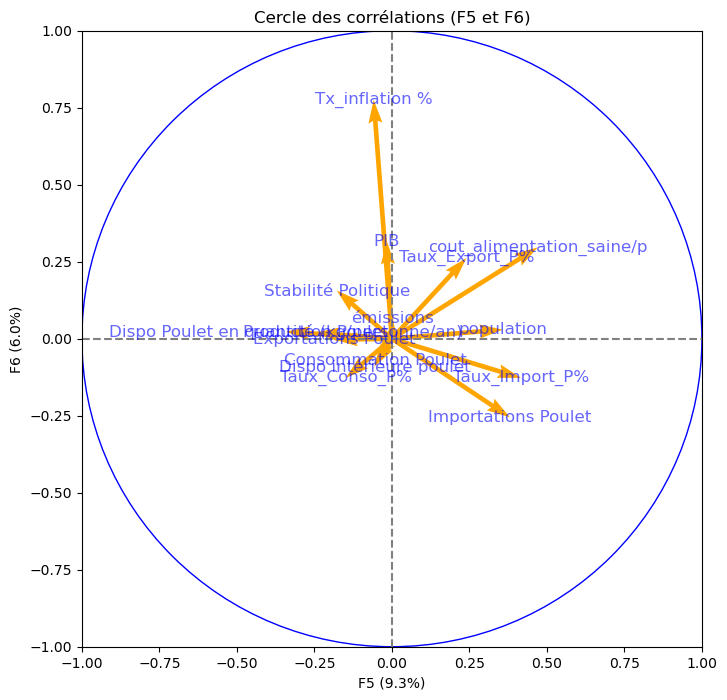

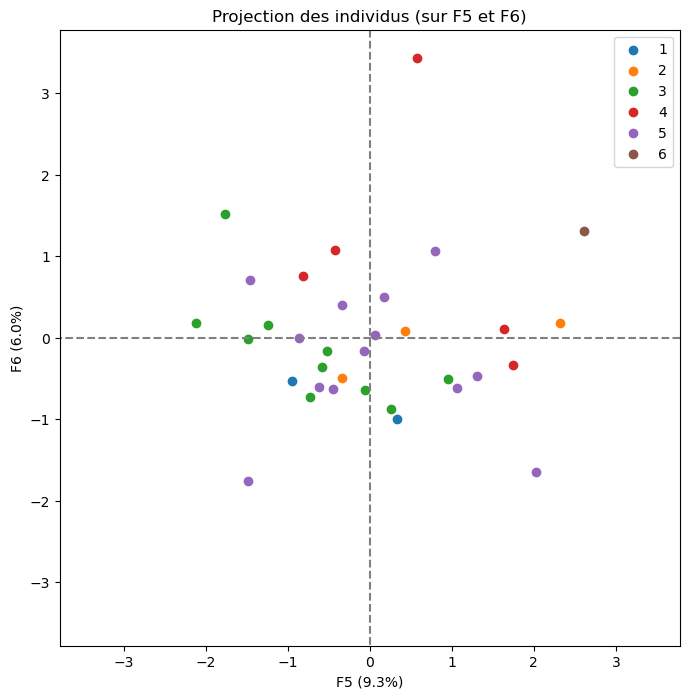

In [351]:
features = poulet3.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(4,5)], labels = np.array(features))

X_projected = pca.transform(poulet3)
display_factorial_planes(X_projected, n_comp, pca, [(4,5)], labels =None, alpha=1, illustrative_var=clusters)

plt.show()

## K-Means 

In [352]:
df_imputed3 = df_data3.copy() 

for column in df_imputed3.columns[df_imputed3.isnull().any()]:
    X = df_imputed3.drop(column, axis=1) 
    y = df_imputed3[column]  
    
    X_train = X[y.notnull()]  
    y_train = y[y.notnull()]  
    X_test = X[y.isnull()] 
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    df_imputed3.loc[y.isnull(), column] = y_pred

df_imputed3.head()

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %
Zone,,,,,,,,,,,,,,,
Afrique du Sud,57009756,35.69,2118.00,63.00,514.00,2035.00,1667.00,5.70,0.57,6.41,-0.28,1497.23,13950.50,5083.59,6.90
Allemagne,82658409,19.47,1739.00,646.00,842.00,1609.00,1514.00,1.27,1.10,2.06,0.59,1016.89,53071.50,13862.96,2.76
Arabie saoudite,33101178,43.36,1435.00,10.00,722.00,1435.00,616.00,2.73,0.45,7.93,-0.64,1255.96,45795.50,13245.29,-0.82
Argentine,43937140,42.24,1962.00,207.00,8.00,1856.00,2161.00,0.24,0.33,5.44,0.17,1219.47,23597.10,6318.15,17.67
Australie,24584620,47.65,1171.00,42.00,16.00,1171.00,1269.00,0.25,0.08,5.25,0.90,824.54,48400.20,9718.73,0.89


In [353]:
imputer3 = SimpleImputer(strategy="mean")
column_to_impute = "Stabilité Politique"

df_imputed3 = df_data3.copy()

X = df_imputed3.drop(column_to_impute, axis=1)
y = df_imputed3[column_to_impute]

X_imputed3 = imputer.fit_transform(X)

df_imputed3[X.columns] = X_imputed3
scaler = StandardScaler()
X_scaled3 = scaler.fit_transform(df_imputed3)

pca = PCA(n_components = 2)
X_reduced3 = pca.fit_transform(X_imputed3)

df_X_reduced3 = pd.DataFrame(X_reduced3,index = df_imputed3.index)

In [354]:
df_X_reduced3.head()

,0,1
Zone,,
Afrique du Sud,-10609668.02,-11867.50
Allemagne,15038982.07,30022.72
Arabie saoudite,-34518248.18,19238.73
Argentine,-23682284.69,-3099.10
Australie,-43034806.49,20497.09


In [355]:
def cluster(n_clusters):
    kmeans3 = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans3.fit(X_reduced3)
    Z = kmeans3.predict(X_reduced3)
    return kmeans3, Z

#max_clusters = len(df_X_reduced)
max_clusters = 20
inerties = np.zeros(max_clusters)

for i in range(1, max_clusters):
    kmeans3, Z = cluster(i)
    inerties[i] = kmeans3.inertia_

data_kmeans3 = pgo.Scatter(
    x=np.arange(1, max_clusters),
    y=inerties[1:]
)

layout3 = pgo.Layout(
    title="k-means3 clustering",
    xaxis=pgo.layout.XAxis(title="Nb clusters", range=[0, max_clusters]),
    yaxis=pgo.layout.YAxis(title="Inertie")
)

fig3 = pgo.Figure(data=data_kmeans3, layout=layout3)
iplot(fig3, filename="clustering-inerties")

# Visualisation par quantité de clusters 

Inertia 2 : 421.22
Nombre d'itérations 2: 4.00
Inertia 3 : 347.34
Nombre d'itérations 3: 5.00
Inertia 4 : 295.78
Nombre d'itérations 4: 6.00
Inertia 5 : 254.18
Nombre d'itérations 5: 3.00


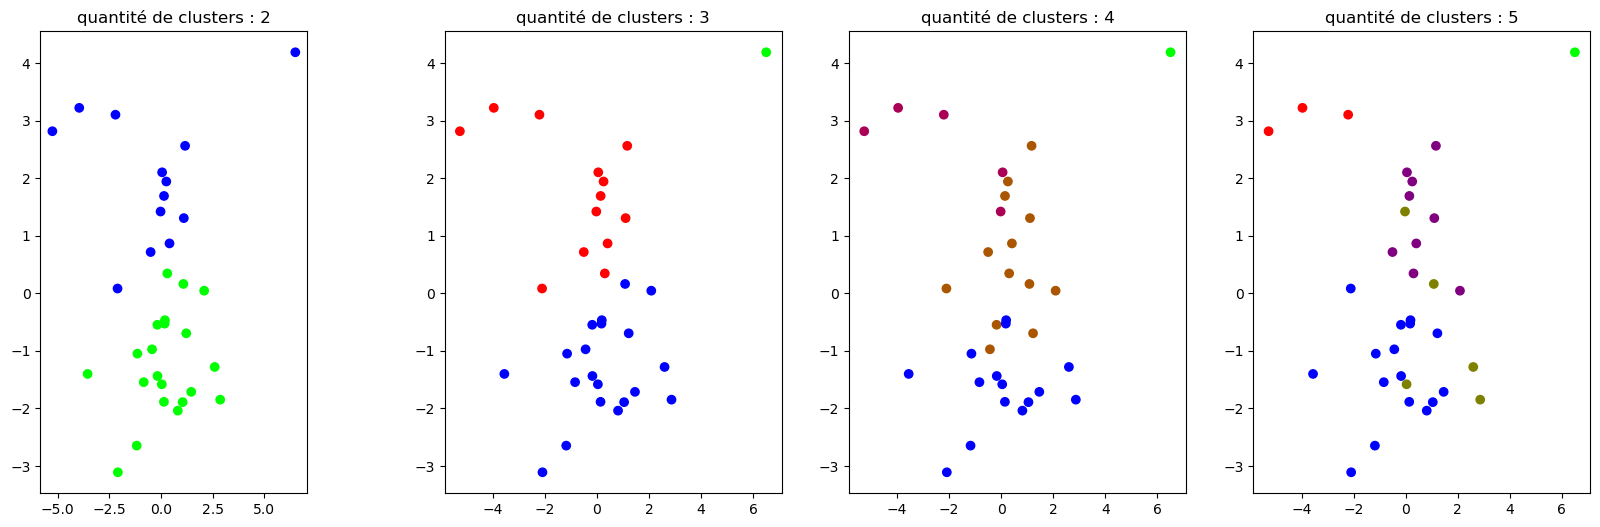

In [356]:
fig = plt.figure(figsize=(20, 6))
# X_scaled3 = X_scaled3[~np.isnan(X_scaled3).any(axis=1)]
imputer = SimpleImputer(strategy='mean')
X_scaled3 = imputer.fit_transform(X_scaled3)

cluster_params = [(2, 151), (3, 142), (4, 143), (5, 144)]

for n_clusters, subplot_num in cluster_params:
    km = KMeans(n_clusters=n_clusters)
    start = time.time()
    km.fit(X_scaled3)
    ax = fig.add_subplot(subplot_num)
    ax.scatter(X_projected[:, 0][:96], X_projected[:, 1][:96], c=km.labels_[:96], cmap="brg")
    ax.set_title("quantité de clusters : {}".format(n_clusters))
    end = time.time()
    # print(f"Time: {end - start}")
    # print(km.cluster_centers_)
    # print(km.labels_)
    print("Inertia {} : {:.2f}".format(n_clusters, km.inertia_))
    print("Nombre d'itérations {}: {:.2f}".format(n_clusters, km.n_iter_))

#### Au regard des graphiques, on peut remarquer que 3 clusters suffiront (ils restent bien distincts l'un de l'autre, peu de chevauchement parmis les individus, d'un cluster à l'autre) 

### Clustering par K-means 

In [357]:
kmeans = KMeans( n_clusters = 3 , n_init = 10, random_state=42)

In [358]:
kmeans.fit(X_scaled3)

KMeans(n_clusters=3, n_init=10, random_state=42)

### Récupération des clusters pour chaque individu et ajout des clusters au dataframe

In [359]:
clusters = kmeans.labels_

In [360]:
X_scaled_clustered = pd.DataFrame(X_scaled3, columns=df_data3.columns, index= df_data3.index)
X_scaled_clustered["cluster"] = clusters

X_scaled_clustered.head()

,population,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,cout_alimentation_saine/p,PIB,émissions,Tx_inflation %,cluster
Zone,,,,,,,,,,,,,,,,
Afrique du Sud,-0.19,0.82,0.66,-0.47,0.74,0.68,0.21,2.20,-0.21,1.58,0.02,0.94,-0.63,-0.44,0.32,1
Allemagne,0.28,-0.54,0.25,1.26,1.76,0.20,0.03,-0.08,-0.04,-0.85,0.97,-0.33,1.65,1.13,-0.23,1
Arabie saoudite,-0.63,1.47,-0.08,-0.62,1.39,0.01,-1.03,0.67,-0.25,2.43,-0.37,0.30,1.22,1.02,-0.71,1
Argentine,-0.44,1.37,0.49,-0.04,-0.84,0.48,0.79,-0.61,-0.28,1.03,0.51,0.21,-0.07,-0.22,1.77,1
Australie,-0.79,1.83,-0.37,-0.53,-0.82,-0.28,-0.26,-0.61,-0.36,0.93,1.30,-0.84,1.38,0.39,-0.48,1


In [361]:
X_scaled_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Afrique du Sud to Égypte
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   population                                 34 non-null     float64
 1   Dispo Poulet en quantité (kg/personne/an)  34 non-null     float64
 2   Dispo intérieure poulet                    34 non-null     float64
 3   Exportations Poulet                        34 non-null     float64
 4   Importations Poulet                        34 non-null     float64
 5   Consommation Poulet                        34 non-null     float64
 6   Production Poulet                          34 non-null     float64
 7   Taux_Import_P%                             34 non-null     float64
 8   Taux_Export_P%                             34 non-null     float64
 9   Taux_Conso_P%                              34 non-null     float64
 10  Stabilité Politi

### Création d'une PCA réduisant les données à 3 dimensions pour visualisation

In [362]:
pca = PCA(n_components = 3)
pca.fit(X_scaled3)

PCA(n_components=3)

#### Mise à l'échelle 

In [363]:
X_reduced2 = pca.transform(X_scaled3)

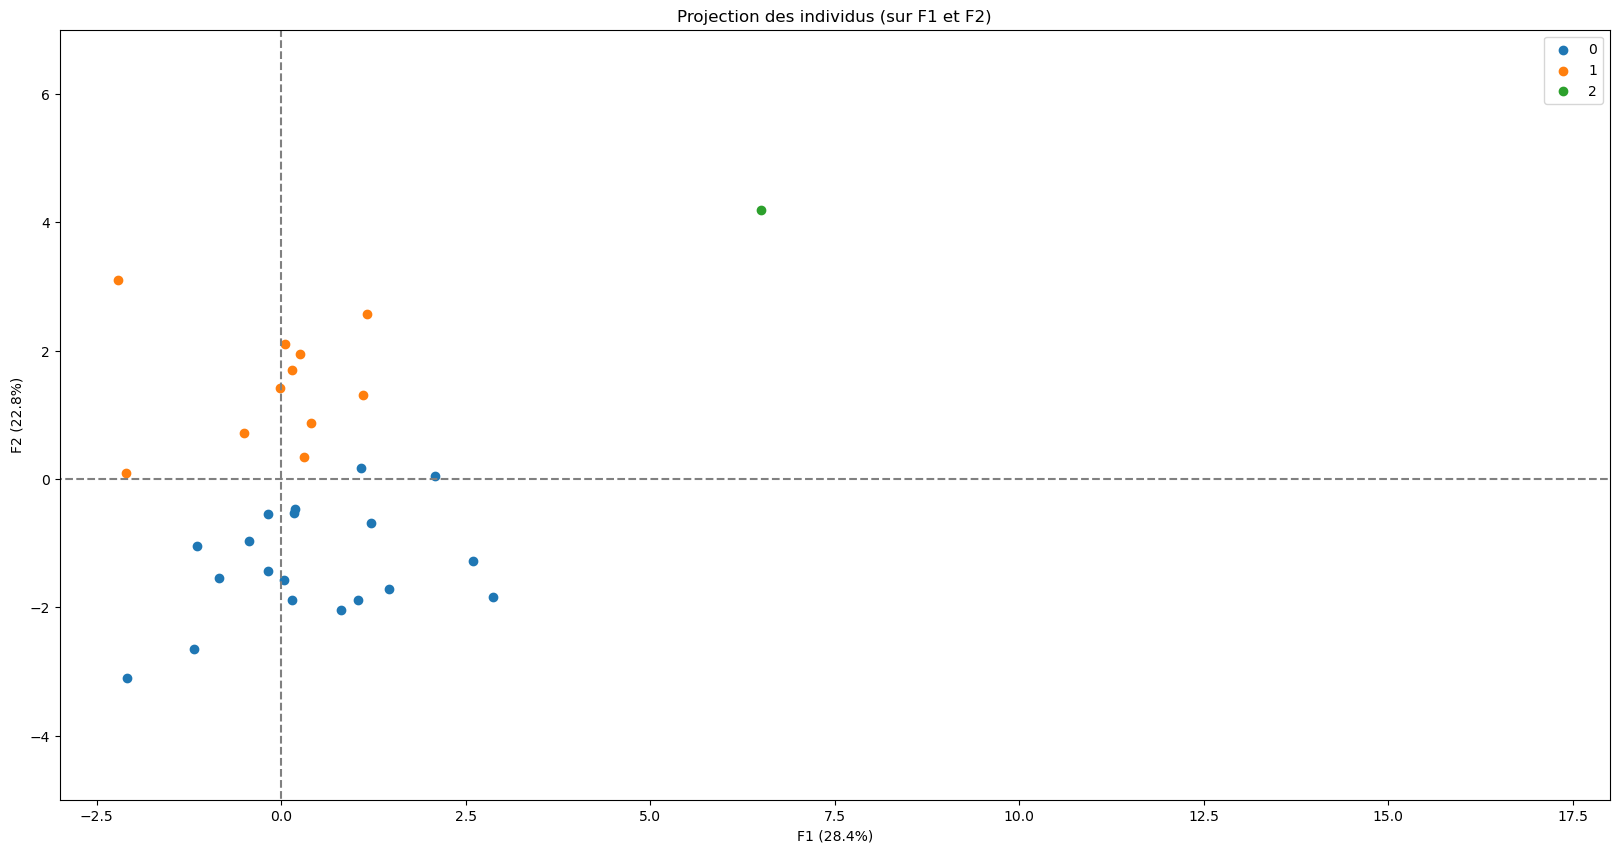

In [364]:
def display_factorial_planes2(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(20,10))
        
            scatter = None
            
            # affichage des points
            if illustrative_var is None:
                scatter = plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                    plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
             # définition des limites du graphique
            plt.xlim([-3, 18])
            plt.ylim([-5, 7])

            cursor = mplcursors.cursor(scatter, hover=True)
            @cursor.connect("add")
            def on_add(sel):
                index = sel.target.index
                country_name = labels[index]
                sel.annotation.set_text(country_name)
            
            
            plt.show(block=False)
display_factorial_planes2(X_reduced2, 3, pca, [(0,1)], illustrative_var = clusters)

#### Taille des clusters  

In [365]:
X_scaled_clustered["cluster"].value_counts()

0    20
1    13
2     1
Name: cluster, dtype: int64

### Carte des clusters pour les pays restants  

In [366]:
color_pal = sns.color_palette("bright", 10)

def display_parcoord_centroids(df, num_clusters):
    fig = plt.figure(figsize=(15,8))
    title = fig.suptitle("Coordonnées parallèles pour les centroïdes", fontsize = 16)
    fig.subplots_adjust(top=0.9, wspace=0)
    plt.xticks(fontsize = 13, rotation = 90)
    plt.yticks(fontsize=12)
    parallel_coordinates(df, "cluster", color= color_pal)
    
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

In [367]:
#génère un DataFrame contenant les coordonnées des centroïdes des clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = df_data3.columns)
centroids["cluster"] = centroids.index

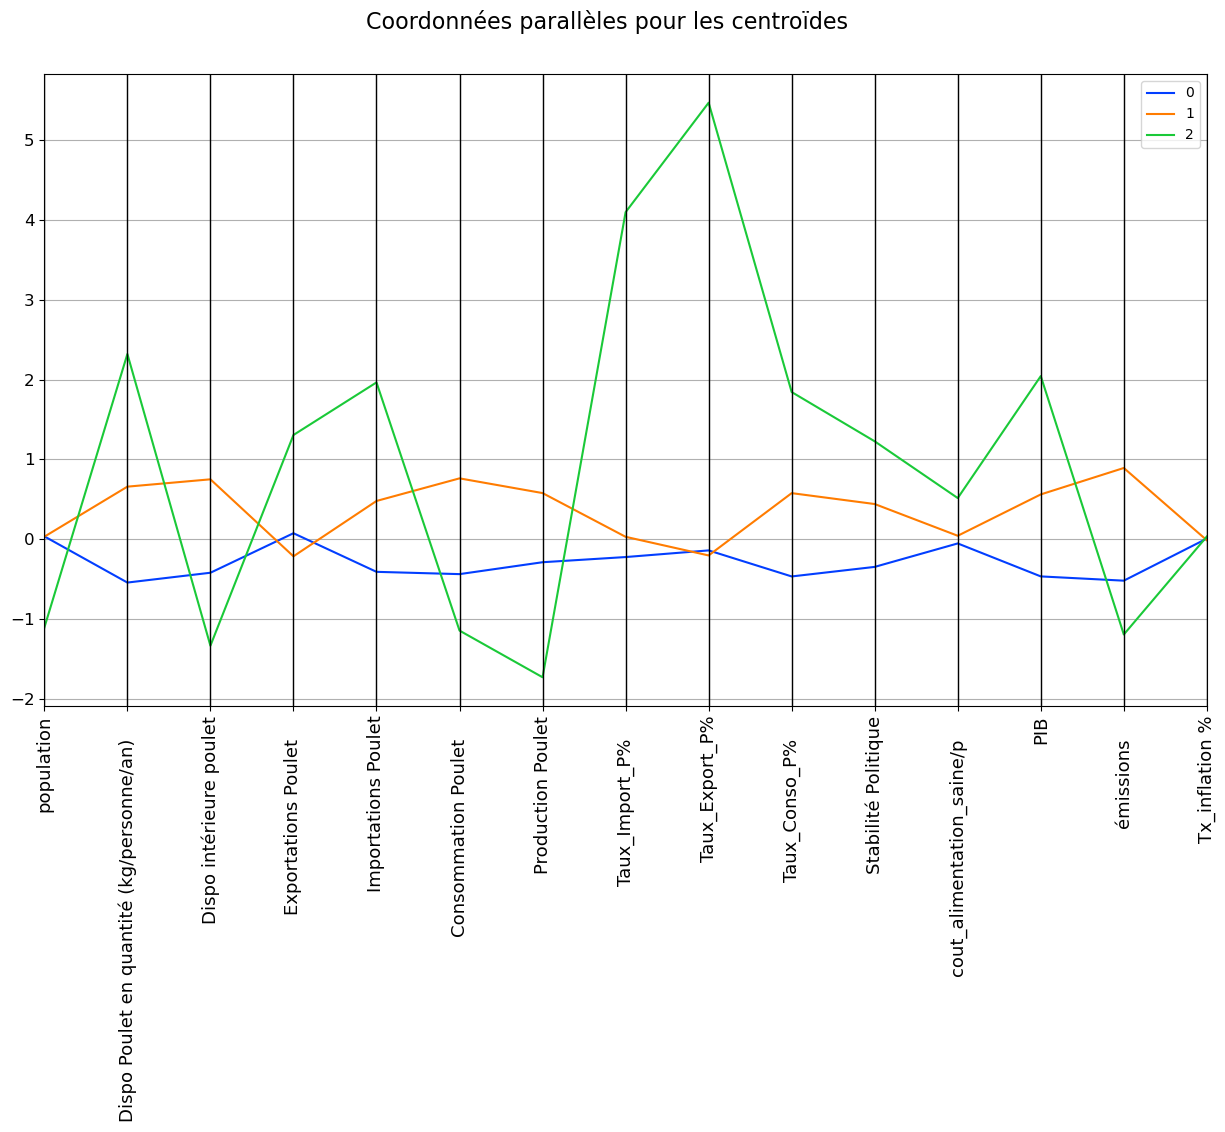

In [368]:
#génère un graphique de coordonnées parallèles pour visualiser les centroïdes des clusters
display_parcoord_centroids(centroids,12)

Le cluster 1 représent au mieux les pays à cibler pour l'expor

In [369]:
X_scaled_clustered.reset_index(inplace=True)
X_scaled_clustered.rename(columns={"index" : "Zone"}, inplace = True)

In [374]:
#extrait les lignes du DataFrame X_scaled_clustered où la valeur dans la colonne "cluster" est égale à 1 et 2
df_clust1_2 = X_scaled_clustered[(X_scaled_clustered['cluster'] == 1) | (X_scaled_clustered['cluster'] == 2)]

In [375]:
#extrait la colonne "Zone" du DataFrame df_clust1 et la convertit en une liste à l'aide de la méthode tolist().
df_clust1_2["Zone"].tolist()

['Afrique du Sud',
 'Allemagne',
 'Arabie saoudite',
 'Argentine',
 'Australie',
 'Canada',
 'Chine - RAS de Hong-Kong',
 'Espagne',
 'Fédération de Russie',
 "Iran (République islamique d')",
 'Japon',
 'Malaisie',
 'Mexique',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]